# 1. <a id='toc1_'></a>[科学技術計算2](#toc0_)

この演習トピックでは，実数を有限のビット数で近似的に表現する浮動小数点表現と，限られたビット数で数値を表すことによる誤差が数値計算にどのように影響を与えるのかを理解する．具体的には，実数の数値表現，浮動小数点数の丸め誤差，桁落ち，情報落ちなど，数値計算に関連する誤差の基本的な概念と，その対処方法を学ぶ．

まずこのnotebookで用いるモジュールをインポートしておく．


In [ ]:
import numpy as np
rng = np.random.default_rng()

from typing import Tuple
import sys
import math
import scipy

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.bbox"] = "tight"
plt.gray()


**目次**<a id='toc0_'></a>    
- 1. [科学技術計算2](#toc1_)    
  - 1.1. [計算機における数値表現：整数](#toc1_1_)    
    - 1.1.1. [計算機における整数の表現](#toc1_1_1_)    
    - 1.1.2. [整数の2進数表現](#toc1_1_2_)    
      - 1.1.2.1. [整数の2進数と10進数の変換の復習](#toc1_1_2_1_)    
        - 1.1.2.1.1. [例1：正の数の場合](#toc1_1_2_1_1_)    
        - 1.1.2.1.2. [例2：負の数の場合](#toc1_1_2_1_2_)    
    - 1.1.3. [計算機における実数値表現](#toc1_1_3_)    
      - 1.1.3.1. [例1：累積誤差の例](#toc1_1_3_1_)    
      - 1.1.3.2. [例2：実数比較の問題](#toc1_1_3_2_)    
      - 1.1.3.3. [例3：差を取る場合の誤差](#toc1_1_3_3_)    
      - 1.1.3.4. [誤差の原因](#toc1_1_3_4_)    
  - 1.2. [計算機における数値表現：実数](#toc1_2_)    
    - 1.2.1. [実数の2進数表現](#toc1_2_1_)    
      - 1.2.1.1. [固定小数点表現](#toc1_2_1_1_)    
      - 1.2.1.2. [浮動小数点表現](#toc1_2_1_2_)    
    - 1.2.2. [浮動小数点表現と指数表記（e表記）の例](#toc1_2_2_)    
      - 1.2.2.1. [10進数の場合](#toc1_2_2_1_)    
      - 1.2.2.2. [2進数の場合](#toc1_2_2_2_)    
  - 1.3. [浮動小数点表現の規格](#toc1_3_)    
    - 1.3.1. [IEEE754の2進浮動小数点表現](#toc1_3_1_)    
    - 1.3.2. [補足](#toc1_3_2_)    
      - 1.3.2.1. [10進数の浮動小数点数](#toc1_3_2_1_)    
      - 1.3.2.2. [IEEE754の歴史](#toc1_3_2_2_)    
      - 1.3.2.3. [非標準規格：bfloat16](#toc1_3_2_3_)    
    - 1.3.3. [浮動小数点表現の規格：IEEE754](#toc1_3_3_)    
      - 1.3.3.1. [仮数部の変換](#toc1_3_3_1_)    
      - 1.3.3.2. [例](#toc1_3_3_2_)    
      - 1.3.3.3. [非正規仮数についての補足](#toc1_3_3_3_)    
    - 1.3.4. [IEEE754のビット表現](#toc1_3_4_)    
      - 1.3.4.1. [binary64のビット表現](#toc1_3_4_1_)    
      - 1.3.4.2. [binary32のビット表現](#toc1_3_4_2_)    
    - 1.3.5. [float64のビット列の例](#toc1_3_5_)    
    - 1.3.6. [float64が表現可能な最大値](#toc1_3_6_)    
      - 1.3.6.1. [pythonのfloatの情報](#toc1_3_6_1_)    
      - 1.3.6.2. [numpyのnp.float64情報](#toc1_3_6_2_)    
    - 1.3.7. [float64が表現可能な最小値](#toc1_3_7_)    
      - 1.3.7.1. [正規化数の最小値](#toc1_3_7_1_)    
      - 1.3.7.2. [非正規化数の最小値](#toc1_3_7_2_)    
    - 1.3.8. [オーバーフロー，アンダーフロー，0，Nan，Inf](#toc1_3_8_)    
  - 1.4. [誤差](#toc1_4_)    
    - 1.4.1. [相対誤差と絶対誤差](#toc1_4_1_)    
    - 1.4.2. [浮動小数点を用いた計算における誤差](#toc1_4_2_)    
    - 1.4.3. [丸め誤差](#toc1_4_3_)    
      - 1.4.3.1. [丸め誤差：切り捨ての場合](#toc1_4_3_1_)    
      - 1.4.3.2. [一般的な丸め誤差の限界](#toc1_4_3_2_)    
      - 1.4.3.3. [丸め誤差の影響１：0.1 + 0.2 != 0.3](#toc1_4_3_3_)    
      - 1.4.3.4. [0捨1入](#toc1_4_3_4_)    
        - 1.4.3.4.1. [10進数の四捨五入（復習）](#toc1_4_3_4_1_)    
        - 1.4.3.4.2. [2進数の場合](#toc1_4_3_4_2_)    
      - 1.4.3.5. [丸め誤差の影響２：(0.1 + 0.2) - 0.3 != 0](#toc1_4_3_5_)    
      - 1.4.3.6. [浮動小数点数に等価演算子を用いるべきではない](#toc1_4_3_6_)    
    - 1.4.4. [浮動小数点同士の比較](#toc1_4_4_)    
      - 1.4.4.1. [非対称な関数](#toc1_4_4_1_)    
      - 1.4.4.2. [対称な関数](#toc1_4_4_2_)    
      - 1.4.4.3. [その他](#toc1_4_4_3_)    
    - 1.4.5. [マシンイプシロン（機械精度）](#toc1_4_5_)    
    - 1.4.6. [ULP（Unit in the Last Place）](#toc1_4_6_)    
    - 1.4.7. [情報落ち：大きな数＋小さな数](#toc1_4_7_)    
    - 1.4.8. [桁落ち：近い値同士の引き算](#toc1_4_8_)    
      - 1.4.8.1. [桁落ちの例](#toc1_4_8_1_)    
        - 1.4.8.1.1. [桁落ち後の数値の解釈](#toc1_4_8_1_1_)    
      - 1.4.8.2. [有効桁数，有効数字](#toc1_4_8_2_)    
        - 1.4.8.2.1. [有効数字](#toc1_4_8_2_1_)    
        - 1.4.8.2.2. [有効桁数](#toc1_4_8_2_2_)    
      - 1.4.8.3. [桁落ちの有効桁数](#toc1_4_8_3_)    
        - 1.4.8.3.1. [引き算前の有効桁数](#toc1_4_8_3_1_)    
        - 1.4.8.3.2. [引き算後の有効桁数](#toc1_4_8_3_2_)    
    - 1.4.9. [誤差の伝播](#toc1_4_9_)    
      - 1.4.9.1. [加減算における誤差の伝播](#toc1_4_9_1_)    
        - 1.4.9.1.1. [減算における相対誤差の拡大の数値例](#toc1_4_9_1_1_)    
        - 1.4.9.1.2. [加算における相対誤差の数値例](#toc1_4_9_1_2_)    
      - 1.4.9.2. [乗除算における誤差の伝播](#toc1_4_9_2_)    
  - 1.5. [計算に考慮が必要な例](#toc1_5_)    
    - 1.5.1. [式中の引き算における桁落ちの回避](#toc1_5_1_)    
      - 1.5.1.1. [例1：平方根](#toc1_5_1_1_)    
      - 1.5.1.2. [例2：三角関数](#toc1_5_1_2_)    
    - 1.5.2. [計算式におけるアンダーフローの回避1：二項分布における確率の積](#toc1_5_2_)    
    - 1.5.3. [計算式におけるアンダーフローの回避2：言語モデルにおける確率の積](#toc1_5_3_)    
    - 1.5.4. [計算式におけるオーバーフローの回避1：log-sum-exp](#toc1_5_4_)    
    - 1.5.5. [計算式におけるオーバーフローの回避2：softmax](#toc1_5_5_)    
  - 1.6. [収束判定と停止条件](#toc1_6_)    
  - 1.7. [Pythonの浮動小数点数](#toc1_7_)    
    - 1.7.1. [int型とfloat型](#toc1_7_1_)    
    - 1.7.2. [np.float32/64](#toc1_7_2_)    
    - 1.7.3. [ndarrayの型変換](#toc1_7_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1.1. <a id='toc1_1_'></a>[計算機における数値表現：整数](#toc0_)

数学における数には，以下のような種類がある．

- 自然数，整数，有理数，無理数，複素数

計算機では，これらの数を限られたビット数で表現する必要がある．

### 1.1.1. <a id='toc1_1_1_'></a>[計算機における整数の表現](#toc0_)

計算機では，**整数型**が有限のビット数で整数値を表現する．言語によって型の名前やビット数が異なるが，以下のような型がよく使われる．

- 8ビット（1バイト）：byte/char/uchar/int8/uint8
- 16ビット（2バイト）：int/uint/int16/uint16/short/unsigned short
- 32ビット（4バイト）：int/short/int32/long
- 64ビット（8バイト）：int64/long/long long
- 無限長整数：ソフトウェアで実装

なお，特定の型が何ビットで表現されるかは，C言語などでは処理系依存で異なるため注意が必要である．以下に代表的なデータモデルを示す．

- [LP64](https://www.wdic.org/w/TECH/%E3%83%87%E3%83%BC%E3%82%BF%E5%9E%8B%E3%83%A2%E3%83%87%E3%83%AB#LLP64)（Unix/Linux/macOS）：`int`は32ビット，`long`とポインタは64ビット
- [LLP64](https://www.wdic.org/w/TECH/%E3%83%87%E3%83%BC%E3%82%BF%E5%9E%8B%E3%83%A2%E3%83%87%E3%83%AB#LP64)（Windows）：intとlongは32ビット，ポインタは64ビット
  - https://en.cppreference.com/w/cpp/language/types
    > - LLP64 or 4/4/8 (int and long are 32-bit, pointer is 64-bit)
    >   - Win32 API (also called the Windows API) with compilation target 64-bit ARM (AArch64) or x86-64 (a.k.a. x64)
    > - LP64 or 4/8/8 (int is 32-bit, long and pointer are 64-bit)
    >   - Unix and Unix-like systems (Linux, macOS)

Javaでは`int`は32ビット，`long`は64ビットである．

- https://docs.oracle.com/javase/jp/8/docs/api/java/lang/Integer.html
- https://docs.oracle.com/javase/jp/8/docs/api/java/lang/Long.html

Pythonでは無限長整数を扱うことができ，整数に精度の制限はない．

- https://docs.python.org/ja/3/library/stdtypes.html#numeric-types-int-float-complex
  > 整数には精度の制限がありません。

### 1.1.2. <a id='toc1_1_2_'></a>[整数の2進数表現](#toc0_)

$t$ビット符号なし整数（uint8, uint16, etc）の場合，
2進数と10進数の変換は次式で行う．

$$
(d_t \cdots d_2 d_1 d_0)_2 = 2^0 d_0 + 2^1 d_1 + 2^2 d2 + \cdots + 2^t d_t = \sum_{i=0}^t d_i 2^i
$$

$t$ビット符号付き整数（int8, int16, int32, int64, int128, etc）の場合には，次のように表現する．

- 符号ビットに1ビットを割り当て，0なら正，1なら負を表現する．
- 残りの$t−1$ビットで整数を表現し，負の数には補数表現を用いる．


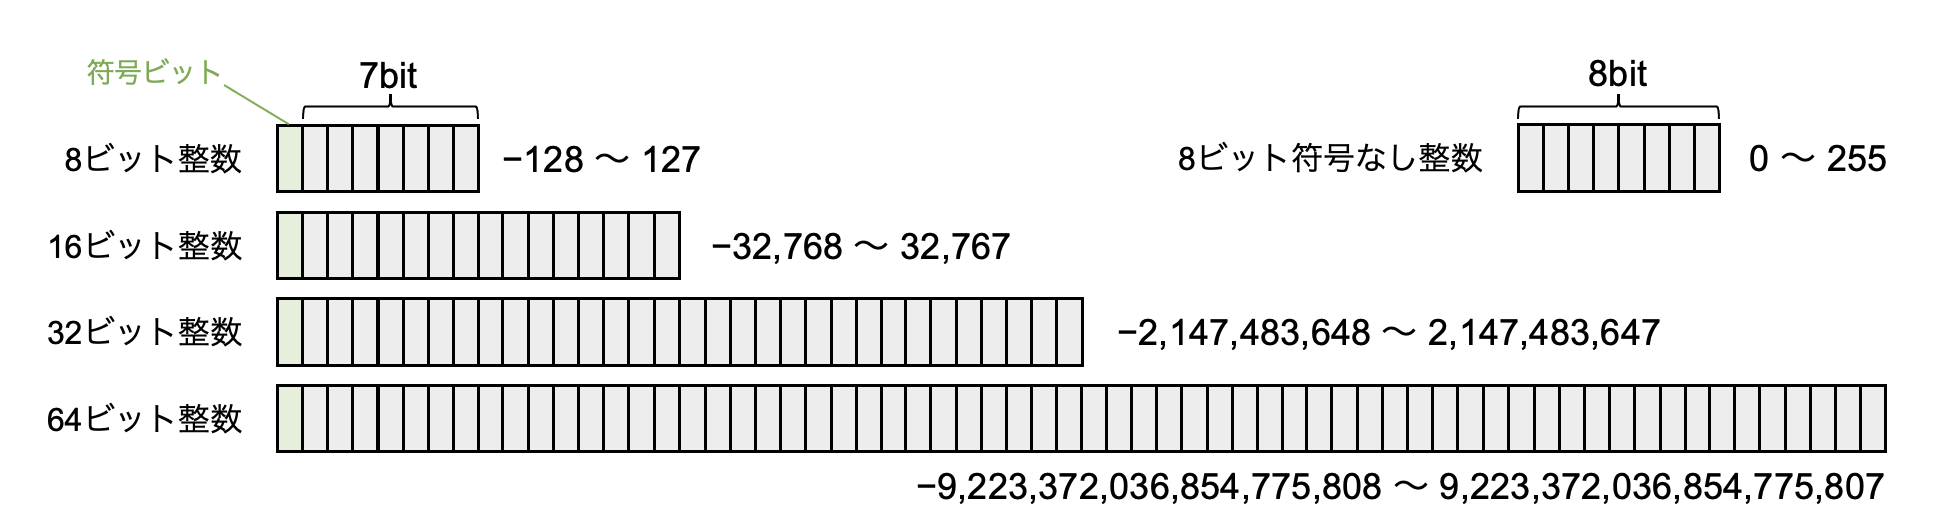

#### 1.1.2.1. <a id='toc1_1_2_1_'></a>[整数の2進数と10進数の変換の復習](#toc0_)

ここでは，8ビットの整数のうち1ビットを符号ビットとして使用する例を示す．7ビットで数値部分を表現し，符号ビットが0なら正の数，1なら負の数を表す．また，負の数は2の補数で表現される．

##### 1.1.2.1.1. <a id='toc1_1_2_1_1_'></a>[例1：正の数の場合](#toc0_)

10進数の42を，8ビット符号付きの2進数に変換すると次のようになる．

$$
42 = 2^5 + 2^3 + 2^1 = (00101010)_2
$$

これを10進数に戻すと，以下のようになる．

$$
(00101010)_2 = 2^5 + 2^3 + 2^1 = 42
$$

##### 1.1.2.1.2. <a id='toc1_1_2_1_2_'></a>[例2：負の数の場合](#toc0_)

次に，負の数-42を2進数に変換する．まず，正の42を2進数で表現し，その後2の補数を取る．

正の42の2進数は次の通りである．

$$
42 = (00101010)_2
$$

この値の2の補数を取るため，まずすべてのビットを反転する．

$$
(00101010)_2 \rightarrow (11010101)_2
$$

次に，この反転した値に1を加える．

$$
(11010101)_2 + 1 = (11010110)_2
$$

これが-42の2の補数表現である．

これを10進数に戻には，まず2の補数を取って（1を引いて反転）元に戻す．

$$
(11010110)_2 \rightarrow (11010101)_2
$$

これを10進数に変換する．

$$
(11010101)_2 = -(2^5 + 2^3 + 2^1) = -42
$$



### 1.1.3. <a id='toc1_1_3_'></a>[計算機における実数値表現](#toc0_)

実数型も有限のビット数で実数値を表現するが，任意精度の実数を有限のビット数で表現することはできない．そのため，計算機による実数の数値表現やそれを用いた計算には，必然的に誤差が生じる．

#### 1.1.3.1. <a id='toc1_1_3_1_'></a>[例1：累積誤差の例](#toc0_)

以下のコードは，0.1を10000回足し合わせているが，計算結果は厳密に1000にならない．

これは，0.1が計算機内で有限のビット数により近似されているため，足し合わせるごとに誤差が累積していくためである．

In [ ]:
p = 0.0
for _ in range(10000):
    p += 0.1
print(p)  # 結果は1000ではない


#### 1.1.3.2. <a id='toc1_1_3_2_'></a>[例2：実数比較の問題](#toc0_)

次に，0.1 + 0.2 は厳密には 0.3 であるべきだが，計算機上では次のように期待通りには動作しない．


In [ ]:
0.1 + 0.2 == 0.3  # 結果は False


これにより，以下のif文のコードも期待通りに動作しない．

In [ ]:
a = 0.1 + 0.2

if a == 0.3:
    print(f"a is 0.3")
else:
    print("a is not 0.3")


#### 1.1.3.3. <a id='toc1_1_3_3_'></a>[例3：差を取る場合の誤差](#toc0_)

同様に，0.1 + 0.2 が 0.3 であるはずなので，(0.1 + 0.2) - 0.3 は 0 になるべきだが，実際にはそうならない．

In [ ]:
a = 0.1 + 0.2
b = 0.3
c = a - b

if c == 0:
    print("c is 0")
else:
    print("c is not 0")  # 実際にはこちらが実行される


#### 1.1.3.4. <a id='toc1_1_3_4_'></a>[誤差の原因](#toc0_)

これらの現象はバグではなく，実数を有限のビット数で表現する際に必然的に生じるものである（そのことを知らずにコードを書いたという意味ではバグであるが）．0.1や0.2のような数値は，計算機内部では正確に表現できず，最も近い2進数に丸められて扱われる．この結果，実際の計算では誤差が生じ，それが累積することになる．

この問題はどのプログラミング言語やCPUアーキテクチャでも同様に発生する（特殊用途を除く）．

以下では，これらの現象について詳しく説明していく．



## 1.2. <a id='toc1_2_'></a>[計算機における数値表現：実数](#toc0_)

実数型は，有限のビット数で表現できる範囲と精度を持った実数値を扱う．各言語によって型の名前は異なるが，以下のような型が存在する．

- 16ビット：half/float16/FP16/fp16，半精度浮動小数点型（主にGPU計算などで使用）
- **32ビット：single/float/float32/FP32/fp16，単精度浮動小数点型**
- **64ビット：double/float/float64/FP64/fp64，倍精度浮動小数点型**
- 128ビット：long double，4倍精度浮動小数点型（特殊用途）
- 256ビット：8倍精度浮動小数点型（特殊用途）

一般的に，計算機でよく使用されるのは**32ビット**と**64ビット**の浮動小数点型である．以下では主に**64ビットの実数表現**について説明する．

なおC言語やJavaでは32ビットの実数を`float`，64ビットの実数を`double`と呼ぶが，
pythonでは64ビットの実数を`float`と呼ぶ．異なるプログラミング言語での呼び方に注意が必要である．

- Python：
    - `float`は64ビット：https://docs.python.org/ja/3/library/stdtypes.html#typesnumeric
        > Floating point numbers are usually implemented using double in C;
    - Numpy：https://numpy.org/doc/stable/user/basics.types.html
        - [`np.float16`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float16) / [`np.half`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.half)
            > Half precision float: sign bit, 5 bits exponent, 10 bits mantissa
        - [`np.float32`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float32) / [`np.single`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.single)
            > Platform-defined single precision float: typically sign bit, 8 bits exponent, 23 bits mantissa
        - [`np.float64`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float64) / [`np.double`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.double)
            > Platform-defined double precision float: typically sign bit, 11 bits exponent, 52 bits mantissa.
        - [`np.float128`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float128) / [`np.longdouble`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.longdouble)
            > Extended-precision floating-point number type, compatible with C long double but not necessarily with IEEE 754 quadruple-precision.
- Java：
    - `float`は32ビット：https://docs.oracle.com/javase/jp/8/docs/api/java/lang/Float.html
        > IEEE 754浮動小数点の「シングル・フォーマット」
    - `double`は64ビット：https://docs.oracle.com/javase/jp/8/docs/api/java/lang/Double.html
        > IEEE 754浮動小数点の「ダブル・フォーマット(double format)」
- C/C++：https://en.cppreference.com/w/cpp/language/types
    - `float`は32ビット
        > float — single precision floating-point type. Matches IEEE-754 binary32 format if supported.
    - `double`は64ビット
        > double — double precision floating-point type. Matches IEEE-754 binary64 format if supported.
    - `long double`は128または64ビット（処理系依存）
        > long double — extended precision floating-point type. Matches IEEE-754 binary128 format if supported, otherwise matches IEEE-754 binary64-extended format if supported, otherwise matches some non-IEEE-754 extended floating-point format as long as its precision is better than binary64 and range is at least as good as binary64, otherwise matches IEEE-754 binary64 format.

`numpy`には64ビット，32ビット，16ビットの実数型があり，それぞれを`np.float64`，`np.float32`，`np.float16`という名称で使用することができる．以下の例では，それぞれの型において 0.1 をどのように表現しているかが確認できる．

In [ ]:
# Pythonのデフォルトの実数型（64ビット）の場合
print(0.1, type(0.1))

# np.float64 (64ビット)
a = np.float64(0.1)
print(a, type(a))

# np.float32 (32ビット)
a = np.float32(0.1)
print(a, type(a))

# np.float16 (16ビット)
a = np.float16(0.1)
print(a, type(a))

次に，0.1 を10000回足し合わせる先程の計算を64ビット，32ビット，16ビットの実数型で行う．この例では，浮動小数点数のビット数が減るほど誤差が増大し，数値の精度が低下する様子が確認できる．


In [ ]:
p = np.float64(0.0)
for _ in range(10000):
    p += np.float64(0.1)
print("float64", p)  # 結果は1000ではないが，最も誤差が少ない．

p = np.float32(0.0)
for _ in range(10000):
    p += np.float32(0.1)
print("float32", p)  # 誤差が大きくなり，結果が1000からずれる．

p = np.float16(0.0)
for _ in range(10000):
    p += np.float16(0.1)
print("float16", p)  # 結果は1000からさらに大きくずれる．


### 1.2.1. <a id='toc1_2_1_'></a>[実数の2進数表現](#toc0_)

実数を有限のビット数で表現する方法にはいくつかの方法がある．

#### 1.2.1.1. <a id='toc1_2_1_1_'></a>[固定小数点表現](#toc0_)

一つの方法として，実数を符号部，整数部，小数部に分け，それぞれを固定のビット数で表現する方法がある．この方法では，小数点の位置が固定されているため，**固定小数点表現**（fixed point）と呼ばれる．この方式は単純であるが，各変数に対してビット数の調整ができないため，実用性が低い．そのため，一般的な用途では使われず，FPGAや組み込みシステムなど，ハードウェア依存の特殊用途で用いられることが多い．

- https://ja.wikipedia.org/wiki/%E5%9B%BA%E5%AE%9A%E5%B0%8F%E6%95%B0%E7%82%B9%E6%95%B0

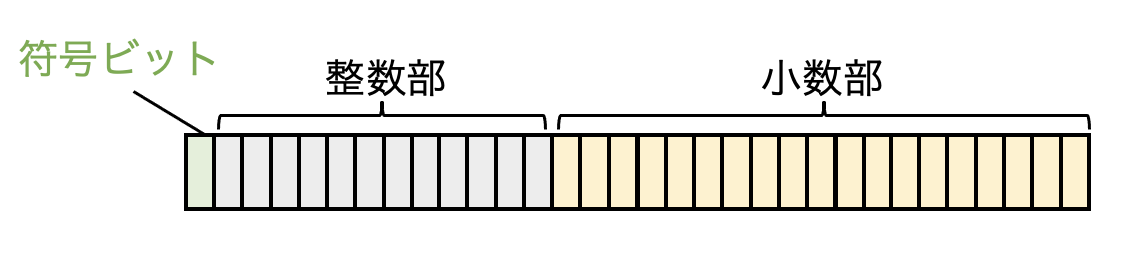

#### 1.2.1.2. <a id='toc1_2_1_2_'></a>[浮動小数点表現](#toc0_)

一般に広く使われている方法は，**浮動小数点表現**（floating point）である．この方法は，光速（$2.99792458 \times 10^8 \mathrm{[m/s]}$）のように非常に大きな数値や，プランク定数（$6.62607015 \times 10^{-34} \mathrm{[m^2 kg / s]}$）のように非常に小さな数値を同じ方法で表現できる．浮動小数点表現では，実数を次の指数形式で表現する．

$$
y \times 10^x
$$

ここで，$y$は仮数部，$x$は指数部と呼ばれる．このように，実数を仮数部と指数部に分けることで，非常に広範な範囲の数値を表現できる．

浮動小数点表現は，それぞれ固定ビット数で表される次の3つの部分で構成される．

- **符号部**（sign）：数値の符号を表す
- **仮数部**（fraction, mantissa, coefficient, significand）：数値の有効桁を表す
- **指数部**（exponent）：数値のスケールを表す

これにより，小数点の位置が変動し，実数の広範な範囲を効率的に表現することができる．この方式は，実数の小数点をその数値の位置に応じて「浮動」させるという意味で**浮動小数点**と呼ばれている．

- https://ja.wikipedia.org/wiki/%E6%B5%AE%E5%8B%95%E5%B0%8F%E6%95%B0%E7%82%B9%E6%95%B0
    > 浮動小数点数（ふどうしょうすうてんすう、英: floating-point number）は、実数をコンピュータで処理（演算や記憶、通信）するために有限桁の小数で近似値として扱う方式であり[1]、コンピュータの数値表現として広く用いられている。多くの場合、符号部、固定長の指数部、固定長の仮数部、の3つの部分を組み合わせて、数値を表現する。

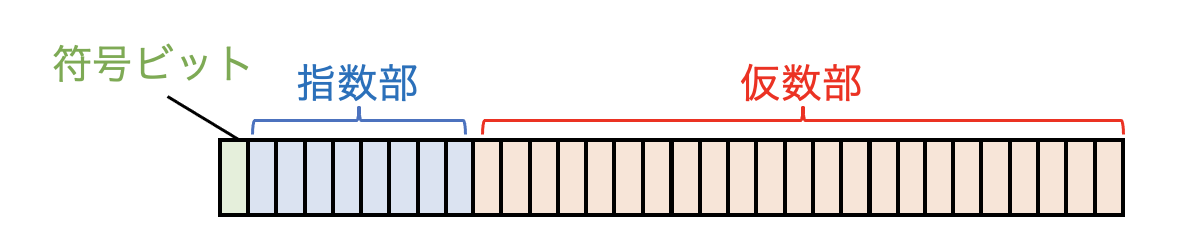

### 1.2.2. <a id='toc1_2_2_'></a>[浮動小数点表現と指数表記（e表記）の例](#toc0_)

浮動小数点表現は，符号部，仮数部，指数部に分けて実数を表す方法である．以下に10進数と2進数の例を示す．

#### 1.2.2.1. <a id='toc1_2_2_1_'></a>[10進数の場合](#toc0_)

10進数の浮動小数点表現では，実数を仮数部と指数部に分けて表記する．この表現方法は**指数表記**や**科学的表記**と呼ばれる．

- $5134 = 5.134 \times 10^3$ = `5.134e3`
- $1 = 1 \times 10^0$ = `+1.0e0`
- $−0.000001234 = −1.234 ×10^{−6}$ = `-1.234e-6`

このように，仮数部を一意に表すために，小数点を移動して仮数部の1桁目の整数部分が非0の数字になるようにし，指数部は10のべきで表す．

コードでは，この形式を`yex`や`yEx`と表し，これを**e表記**（またはE表記）と呼ぶ．`e` は10のべきを表す．たとえば，`1.0e3` は $1.0 \times 10^3$ の意味になる．

- https://ja.wikipedia.org/wiki/%E6%8C%87%E6%95%B0%E8%A1%A8%E8%A8%98
    > 指数表記（しすうひょうき、英: exponential notation）、または科学的表記（scientific notation）[1]は、数の表記方法の1つである。非常に大きな数または非常に小さな数を表記するのに便利で、科学技術分野で多用される。


In [ ]:
print(5.134e3, 1.0e0, 1.234e-6)



#### 1.2.2.2. <a id='toc1_2_2_2_'></a>[2進数の場合](#toc0_)

2進数の場合も同様に，実数を仮数部と指数部に分けて表現する．この方法は，2のべきを使って指数部を表現する．

- $(1001100000000)_2 = (1.0011)_2 \times 2^{12}$
- $(0.001101)_2 = (1.101)_2 \times 2^{−3}$

ここでも，仮数部を一意に表すために，1桁目の整数部分が1となるように小数点を移動させる．これを**正規化表現**と呼ぶ．また，指数部は整数として表す（ここでは指数部を10進数で示しているが，後ほど2進数で表現する方法を説明する）．


## 1.3. <a id='toc1_3_'></a>[浮動小数点表現の規格](#toc0_)

浮動小数点数の符号部，仮数部，指数部を何ビットで表現するか，ビット列の配置方法，進数の種類などについては様々なやり方が考えられる．そのための標準規格として，**IEEE 754**が制定されている．

### 1.3.1. <a id='toc1_3_1_'></a>[IEEE754の2進浮動小数点表現](#toc0_)

- IEEE 754-1985
    - 754-1985 - IEEE Standard for Binary Floating-Point Arithmetic https://ieeexplore.ieee.org/document/30711
        > A family of commercially feasible ways for new systems to perform binary floating-point arithmetic is defined.

        > This standard specifies basic and extended floating-point number formats;
        > add, subtract, multiply, divide, square root, remainder, and compare operations; conversions between integer and floating-point formats; conversions between different floating-point formats; conversions between basic-format floating-point numbers and decimal strings; and floating-point exceptions and their handling, including nonnumbers.
- IEEE 754-2008
    - 754-2008 - IEEE Standard for Floating-Point Arithmetic https://ieeexplore.ieee.org/document/4610935
        > This standard specifies interchange and arithmetic formats and methods for binary and decimal floating-point arithmetic in computer programming environments.

        > This standard provides a method for computation with floating-point numbers that will yield the same result whether the processing is done in hardware, software, or a combination of the two. The results of the computation will be identical, independent of implementation, given the same input data.
- IEEE 754-2019
    - 754-2019 - IEEE Standard for Floating-Point Arithmetic https://ieeexplore.ieee.org/document/8766229
- https://ja.wikipedia.org/wiki/IEEE_754
    > IEEE 754（アイトリプルイーななごおよん、アイトリプルイーななひゃくごじゅうよん）は、別の表記では「IEEE Standard for Floating-Point Arithmetic」と書かれるものであり、1985年にIEEEによって定められた、浮動小数点算術に関する標準規格である。


IEEE754規格には以下のような2進浮動小数点形式がある．

- **IEEE754 binary16**（16ビット）
- **IEEE754 binary32**（32ビット）
- **IEEE754 binary64**（64ビット）
- **IEEE754 binary128**（128ビット）

特に，**binary16/32/64**は現代のほぼすべてのプログラミング言語やCPUアーキテクチャで採用されており，ハードウェアレベルでサポートされている．一方，**IEEE754 binary128**は使用頻度が少なく，プログラミング言語やコンパイラ，CPUでの対応がまちまちである<sup>1</sup>．

- <sup>1</sup>
    - https://ja.wikipedia.org/wiki/%E5%9B%9B%E5%80%8D%E7%B2%BE%E5%BA%A6%E6%B5%AE%E5%8B%95%E5%B0%8F%E6%95%B0%E7%82%B9%E6%95%B0
    - https://en.wikipedia.org/wiki/Quadruple-precision_floating-point_format

以下では，最も一般的な**IEEE754 binary64**を中心に説明する．なお，numpyの型では`float64`であり，一般的にはfp64とも呼ぶ．


### 1.3.2. <a id='toc1_3_2_'></a>[補足](#toc0_)


#### 1.3.2.1. <a id='toc1_3_2_1_'></a>[10進数の浮動小数点数](#toc0_)

一般的には使用されないが，IEEE754 decimal64/decimal32という10進浮動小数点表現の規格も存在する．
これにより，`0.1 + 0.2 == 0.3`が正確に成り立つような計算が可能となる．しかし，通常はハードウェアでサポートされていないため，ソフトウェア実装が必要になる．

- https://en.wikipedia.org/wiki/Decimal32_floating-point_format
- https://en.wikipedia.org/wiki/Decimal64_floating-point_format

これらはPythonの`decimal`モジュールで利用できる．

- https://docs.python.org/ja/3/library/decimal.html
    > decimal モジュールは正確に丸められた十進浮動小数点算術をサポートします。


#### 1.3.2.2. <a id='toc1_3_2_2_'></a>[IEEE754の歴史](#toc0_)

1980年代前半までは，浮動小数点表現に標準規格が存在せず，計算機ごとに異なる形式が使われていた．たとえば，IBM形式では16進数を用いた浮動小数点表現が使われ，DECのVAX形式では独自の2進浮動小数点表現が存在した．そのため，計算機ごとに異なる結果が生じることがあった．


- [David G. Hough, The IEEE Standard 754: One for the History Books, Computer, Vol.52, pp. 109-112, Dec. 2019, doi:10.1109/MC.2019.2926614](https://doi.ieeecomputersociety.org/10.1109/MC.2019.2926614)
    > Each system's arithmetic was different in greater or lesser ways, sometimes even within the same instruction-set architecture.
- https://en.wikipedia.org/wiki/IBM_hexadecimal_floating-point
    - [David Goldberg, What Every Computer Scientist Should Know About Floating-Point Arithmetic, ACM Computing Surveys, Vol.23, Issue 1, pp.5–48, 1991](https://dl.acm.org/doi/10.1145/103162.103163)
        > why did IBM choose $\beta = 16$ for its sytem/370? Only IBM knows (...)
- [Mary Payne, Dileep Bhandarkar, VAX floating point: a solid foundation for numerical computation, ACM SIGARCH Computer Architecture News, Vol.8, Issue 4, pp.22–33, 1980](https://doi.org/10.1145/641845.641849)


IEEE754はこの混乱を収めるために標準化され（企画案としてはDECのVAX形式なども検討された<sup>1</sup>），現在では業界標準として広く採用されている．この規格に従えば，どの計算機でも同一の計算結果が得られることが保証される<sup>2</sup>．


- <sup>1</sup>
    - [David G. Hough, The IEEE Standard 754: One for the History Books, Computer, Vol.52, pp. 109-112, Dec. 2019, doi:10.1109/MC.2019.2926614](https://doi.ieeecomputersociety.org/10.1109/MC.2019.2926614)
        > Why not standardize DEC VAX arithmetic (...) ?
    - [IEEE 754: An Interview with William Kahan, Computer, Vol.31, pp. 114-115, March 1998, doi:10.1109/MC.1998.10038](https://doi.ieeecomputersociety.org/10.1109/MC.1998.10038)
        > Why not copy the VAX?
    - [Mary Payne, Dileep Bhandarkar, VAX floating point: a solid foundation for numerical computation, ACM SIGARCH Computer Architecture News, Vol.8, Issue 4, pp.22–33, 1980](https://doi.org/10.1145/641845.641849)
        - 4つのproposal（企画案）のうち3つが比較されている
- <sup>2</sup> [David Goldberg, What Every Computer Scientist Should Know About Floating-Point Arithmetic, ACM Computing Surveys, Vol.23, Issue 1, pp.5–48, 1991](https://dl.acm.org/doi/10.1145/103162.103163)
    > Thus, when a program is moved from one machine to another, the results of the basic operations will be the same in every bit if both machines support the IEEE standard.



- [Lloyd N. Trefethen and David Bau, Numerical Linear Algebra, Society for Industrial and Applied Mathematics, 1997](https://epubs.siam.org/doi/book/10.1137/1.9781611977165), p.100 Lecture 13. Floating Point Arithmetic
    > Indeed, IEEE arithmetic itself is rapidly becoming the standard for computers of all sizes, including, as of 1996, all IBM-compatible personal computers and all workstations manufactured by SUN, DEC, Hewlett-Packard, and IBM.

#### 1.3.2.3. <a id='toc1_3_2_3_'></a>[非標準規格：bfloat16](#toc0_)

近年では，深層学習向けに**bfloat16**（bf16, brain floating point）が登場しており，様々なプラットフォームがこれに対応を始めている．しかし，まだ標準規格にはなっておらず，したがって計算機ごとに異なる結果が生じるという可能性もないわけではない．

- [Intel White Paper, bfloat16 - Hardware Numerics Definition, Revision 1.0, Nov. 2018](https://www.intel.com/content/www/us/en/content-details/671279/bfloat16-hardware-numerics-definition.html?wapkw=bfloat16)
    > This document describes the bfloat16 floating-point format.

### 1.3.3. <a id='toc1_3_3_'></a>[浮動小数点表現の規格：IEEE754](#toc0_)

IEEE754の2進表現で表される数値の一般形は，以下のように表現される．

$$
(-1)^\mathrm{sign}(d_0 . d_1 d_2 d_3 \cdots d_t)_2 \times 2^{n - \mathrm{bias}}
$$

ここで
- $\mathrm{sign}$：符号（0または1）
- $(d_0 . d_1 d_2 d_3 \cdots d_t )_2$：仮数部（2進数）
    - $d_0=1$の場合，これは**正規化表現**となる
    - $d_0=0$の場合，これは**非正規化表現**である
- $n - \mathrm{bias}$：指数（10進数）
    - bias（オフセット）を引いてから符号付き2進数で表現される
    - **補数表現**は使わず，指数部の大小比較を容易にするため，バイアスが加えられている

#### 1.3.3.1. <a id='toc1_3_3_1_'></a>[仮数部の変換](#toc0_)

仮数部の2進数表記を10進数に変換すると，以下のように表現できる．

- **正規化数の場合**：

\begin{align*}
(\underline{d_0} . d_1 d_2 d_3 \cdots d_t )_2
= \frac{1}{2^0} \underline{1} + \frac{1}{2^1} d_1 + \frac{1}{2^2} d_2 + \cdots + \frac{1}{2^t} d_t
= \underline{1 +} \sum_{i=1}^t d_i 2^{−i}
\end{align*}

- **非正規化数の場合**：

\begin{align*}
(\underline{d_0} . d_1 d_2 d_3 \cdots d_t )_2
= \frac{1}{2^0} \underline{0} + \frac{1}{2^1} d_1 + \frac{1}{2^2} d_2 + \cdots + \frac{1}{2^t} d_t
= \sum_{i=1}^t d_i 2^{−i}
\end{align*}


#### 1.3.3.2. <a id='toc1_3_3_2_'></a>[例](#toc0_)

10進数で9216を2進数表現に変換し，指数部と仮数部で表す例を示す．

- $(9216)_{10}=(10010000000000)_2=(−1)^0 (1.001)_2 \times 2^{13}$

このとき，仮数部と指数部は次のようになる．

- 仮数部：$d_0=1$ なので**正規化数**である．$d_0=1, d_1=0, d_2=0, d_3=1$ なので $(1.001)_2$ と表される．
- 指数部：例えばbias = 10の場合，
    - $2^{13} = 2^{n - \mathrm{bias}}$ より $n = 23$
    - $n = 23 = (10111)_2$ である．


#### 1.3.3.3. <a id='toc1_3_3_3_'></a>[非正規仮数についての補足](#toc0_)

正規仮数は，CPUなどのハードウェアレベルで実装されており，浮動小数点数の演算は高速に計算される．しかし，**非正規化数**はソフトウェア実装で処理されることが多く，その場合，計算が非常に遅くなる．そのため，非正規化数ほどの小さい数を扱う必要がある場合を除き，正規仮数での浮動小数点演算を優先すべきである．

- https://en.wikipedia.org/wiki/Subnormal_number


### 1.3.4. <a id='toc1_3_4_'></a>[IEEE754のビット表現](#toc0_)

IEEE754 binary64とbinary32はビット数が異なるが，基本的な構造は同じであり，仮数部，指数部，符号部で構成されている．

#### 1.3.4.1. <a id='toc1_3_4_1_'></a>[binary64のビット表現](#toc0_)

IEEE754 binary64（倍精度浮動小数点数）のビット構成は以下のように定義されている．

- 一般形：$(−1)^\mathrm{sign}(d_0.d_1 d_2 d_3 \cdots d_{52} )_2 \times 2^{n − 1023}$
    - $\mathrm{sign}$：符号1ビット（正負を表す）
    - $(d_0.d_1 d_2 d_3 \cdots d_{52})_2$：仮数部52ビット＋正規化表現の仮定された1ビットで計53ビットの2進数
        - 正規化表現の場合，$d_0 = 1$が仮定される（格納されない）
    - $n=(n_{11} \cdots n_2 n_1 n_0)_2$：指数部11ビット（$1 \le n \le 2046$，バイアスは1023）
        - $n$は符号なし整数で表現され，指数部の範囲は$−1022 \le n−1023 \le 1023$となる


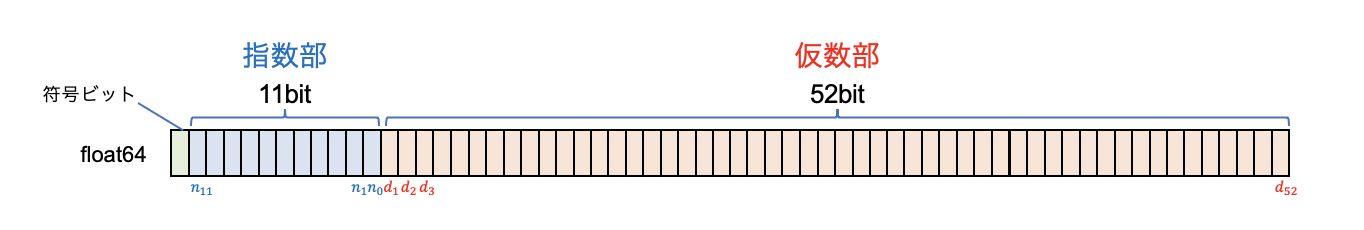

#### 1.3.4.2. <a id='toc1_3_4_2_'></a>[binary32のビット表現](#toc0_)

IEEE754 binary32（単精度浮動小数点数）のビット構成は，binary64と同様の構造であるが，ビット数が異なる．

- 一般形：$(−1)^\mathrm{sign}(d_0.d_1 d_2 d_3 \cdots d_{23} )_2 \times 2^{n − 127}$
    - $\mathrm{sign}$：符号1ビット
    - $(d_0.d_1 d_2 d_3 \cdots d_{23})_2$：仮数部23ビット＋正規化表現の仮定された1ビットで計24ビットの2進数
        - 正規化表現の場合，$d_0 = 1$が仮定される（格納されない）
    - $n=(n_{8} \cdots n_2 n_1 n_0)_2$：指数部8ビット（$1 \le n \le 254$，バイアスは127）
        - $n$は符号なし整数で表現され，指数部の範囲は$−126 \le n−127 \le 127$となる

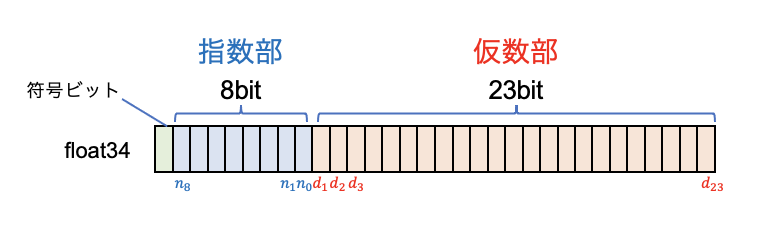

### 1.3.5. <a id='toc1_3_5_'></a>[float64のビット列の例](#toc0_)

具体的な数値について，binary64の実装であるnumpyのfloat64型のビット列を確認してみる．以下のコードは，float64型の実数値を入力として，その2進数表現を`"0"`と`"1"`からなる文字列として返す関数である（中身は理解しなくてよい）．この関数を用いることで，実際に数値がどのように浮動小数点形式で表現されているかを確認できる．


In [ ]:
def float64_to_binary(
    f: float | np.float64,
    separate: bool = False
) -> str | Tuple[str, str, str]:
    """convert float64 to 64 bits as string

        Args:
        f (float | np.float64): IEEE754 binary64 floating point number
        separate (bool, optional): return tuple of (sign bit, exponent bits, mantissa bits) if True,
            return 64 bits if False. Defaults to False.

    Returns:
        str or Tuple of str: bit string of f
    """
    assert isinstance(f, float)
    from struct import pack, unpack

    # see https://note.nkmk.me/python-float-hex/
    s = format(unpack('>Q', pack('>d', f))[0], "064b")

    if separate:
        return s[0:1], s[1:12], s[12:]
    else:
        return s


ではfloat64（pythonの`float`型）である0.1のビット列を確認する．

In [ ]:
float64_to_binary(0.1)


これを，符号部（sign），指数部（exponent），仮数部（mantissa）に分けて表示すると以下のようになる．

In [ ]:
float64_to_binary(0.1, separate=True)


以下では，0.1から0.75までのいくつかの実数を表示している．

In [ ]:
print(f"decimal  s exponent    mantissa")
for f in [
        0.1,
        0.2,
        0.25,
        0.3,
        0.4,
        0.5,
        0.75,
        1.0
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:.2f} --> {s} {e} {m}")


これから分かるように，いくつかの実数では，仮数部が等しかったり，指数部が等しかったりする．
また仮数部のビットが全て0のものもある．

これらを，10進数の浮動小数点表現と対応を取って確認してみる．
そのために，以下のヘルパー関数を用いる．


In [ ]:
def sign_str_to_str(s: str) -> str:
    """sign bit to +/-

    Args:
        s (str): "0" or "1"

    Returns:
        str: "+" if s is "0" else "-" (if s is "1")
    """
    assert isinstance(s, str)
    assert len(s) == 1
    assert s in ["0", "1"]

    return "+" if s == "0" else "-"


In [ ]:
def exponent_str_to_int(
        e: str,
        len_e: int = 11,
        bias: int = 1023
    ) -> Tuple[int, bool]:
    """exponent string to exponent integer

    Args:
        e (str): exponent string consiting of of "0" and "1"
        len_e (int, optional): the number of bits for the exponent. Defaults to 11.
        bias (int, optional): bias to exponent. Defaults to 1023.

    Returns:
        Tuple[int, bool]: exponent in decimal integer, and True if normalized number else False
    """
    assert isinstance(e, str)
    assert len(e) == len_e
    for bit in e:
        assert bit in ["0", "1"]

    p = sum([2**i * int(bit) for i, bit in enumerate(e[::-1])])
    if p > 0:
        p -= bias
        is_normalized = True
    else:
        p = -bias + 1
        is_normalized = False
    if p > bias:
        p = np.nan
    return p, is_normalized


In [ ]:
def mantissa_str_to_float(
        m: str,
        is_normalized: bool,
        len_m: int = 52
    ) -> float:
    """mantissa string to mantissa integer

    Args:
        m (str): mantissa string consiting of of "0" and "1"
        is_normalized (bool): True if m is normalized number else False
        len_m (int, optional): the number of bits for the mantissa. Defaults to 52.

    Returns:
        float: mantissa in decimal float
    """
    assert isinstance(m, str)
    assert len(m) == len_m
    for bit in m:
        assert bit in ["0", "1"]

    p = 1 if is_normalized else 0
    p += sum([2 ** -(i + 1) * int(bit) for i, bit in enumerate(m)])

    return p


In [ ]:
def sem_to_str(s: str, e: str, m: str, n_spaces: int = 0) -> str:
    """convert output strings of `float64_to_binary()` with `separate=True` to a human-readable string

        Args:
        s, e, m (str): bit strings of sign, exponent, and mantissa.
        n_spaces (int, optional): the number of leading white spaces on the left. Defaults to 0.

    Returns:
        str: human-readable string represetnation of a number represented by s, e, and m
    """
    s = sign_str_to_str(s)
    e, is_normalized = exponent_str_to_int(e)
    m = mantissa_str_to_float(m, is_normalized)

    n_spaces = " " * n_spaces

    if e is not np.nan:
        return f"{n_spaces}{s} 2^{e:<+7d} * {m}"
    else:
        return f"{n_spaces}{s} nan/inf   * {m}"


では上記の関数を用いて，0.1の2進数ビット列と，その10進数の浮動小数点表現を確認してみる．

In [ ]:
f = 0.1
s, e, m = float64_to_binary(f, separate=True)
print(f)
print(s, e, m)
print(sem_to_str(s, e, m))


上記のコードの結果は，符号ビット，指数部，仮数部をそれぞれ，float64のビット列と10進数の指数表現で表している．この方法で確認すると，0.1の10進数における指数表現は**仮数部**が1.6で，**指数部**が$2^{-4}$であり，0.1は$1.6 \times 2^{-4}$という指数形式で表現されることが分かる．

他のいくつかの実数についても同様に確認してみる．

In [ ]:
print(f"decimal  s exponent    mantissa")
for f in [
        0.1,
        0.2,
        0.25,
        0.3,
        0.4,
        0.5,
        0.75,
        1.0
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:.2f} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=9))


上記の結果からわかるように，10進数の指数表記では，0.5は次のように表される．

$$
0.5 = 1.0 \times 2^{-1}
$$

また，0.25は次のように表される．

$$
0.25 = 1.0 \times 2^{-2}
$$

どちらの数値も，float64形式では仮数部のビットがすべて0である．これは，正規化表現において仮定される最上位の1ビットが常に1であるため，実際の仮数部は$(1.000...)_2$という表現である．したがって，仮数部は10進数で1である．

一方，0.75は0.5と0.25を足したものである．10進数の指数表記では次のように表される．

$$
0.75 = 1.5 \times 2^{-1}
$$

この場合，対応する2進数の仮数部は$(1.100...)_2$となり，最上位のビットが1で，小数部が0.5に相当するビットを持つ．


### 1.3.6. <a id='toc1_3_6_'></a>[float64が表現可能な最大値](#toc0_)

float64の仮数部と指数部がそれぞれ取りうる値の最大をとると，
全体として表せる最も（絶対値が）大きい数を表現することになる．
その最大値を$f_{\mathrm{max}}$とすると，

\begin{align*}
f_{\mathrm{max}}
&= (1.111 \ldots 1)_2\times 2^U \\
&= (\sum_{i=0}^t 2^{−i}) \times 2^U \\
&= (2 − 2^{−t}) \times 2^U \\
&\approx 2^{U+1}
\end{align*}

となり，ほぼ $2^{U+1}$ に近い値になる．

ここで$U$は指数部の最大値であり，float64では$U=1023$である．
また$t$は仮数部のビット数であり，float64では52ビットである．

このときの float64 のビット列は

```
0 11111111110 1111111111111111111111111111111111111111111111111111
```

または以下のようになる．

```
1 11111111110 1111111111111111111111111111111111111111111111111111
```

これは，10進数に変換すると約 $\pm$ 1.7976931348623157e308 である．
したがって，float64はおよそ $1.8 \times 10^{308}$ から $-1.8 \times 10^{308}$ の範囲で実数を扱うことができる．これは非常に広い範囲をカバーしており，ほとんどの科学技術計算や大規模な数値演算において十分である．

以下のコードは$\pm f_{\mathrm{max}}$の値とビット列を表示している．


In [ ]:
print(f"decimal        s exponent    mantissa")
for f in [
        1.7976931348623157e308,
        -1.7976931348623157e308
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:+.2e} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=15))


#### 1.3.6.1. <a id='toc1_3_6_1_'></a>[pythonのfloatの情報](#toc0_)

python の `float` の情報を取得するには `sys` モジュールの`sys.float_info`を用いる．

- https://docs.python.org/ja/3/library/sys.html#sys.float_info
    > float型に関する情報を保持している名前付きタプルです。

In [ ]:
print(sys.float_info)


pythonのfloat型が表せる最大の浮動小数点数は`sys.float_info.max`である．
これは上記の数値と一致する．


In [ ]:
sys.float_info.max


その他にも，以下のような情報が取得できる．これらはいずれも上記の説明と一致する．

- 仮数部の2進数ビット数：sys.float_info.mant_dig
    - 仮数部の有効桁数（10進数で）：sys.float_info.dig
- 指数部の2の冪の最大値（10進数）：sys.float_info.max_exp
- 指数部の2の冪の最小値（10進数）：sys.float_info.min_exp
- 指数部の最大値（10進数）：sys.float_info.max_10_exp
- 指数部の最小値（10進数）：sys.float_info.min_10_exp

In [ ]:
print(
    "Pythonのfloat型の仮数部の2進数ビット数は",
    sys.float_info.mant_dig,
    "ビットです"
)
print(
    "Pythonのfloat型の有効桁数は10進数で約",
    sys.float_info.dig,
    "桁です"
)
print(
    "Pythonのfloat型の指数部の2の冪の最大値は10進数で",
    sys.float_info.max_exp,
    "，最小値は",
    sys.float_info.min_exp,
    "です",
)
print(
    "Pythonのfloat型の指数部の最大値は10進数で",
    sys.float_info.max_10_exp,
    "，最小値は",
    sys.float_info.min_10_exp,
    "です",
)


#### 1.3.6.2. <a id='toc1_3_6_2_'></a>[numpyのnp.float64情報](#toc0_)

numpy の`np.float64`の情報を取得するには`np.finfo()`を用いる．

- https://numpy.org/doc/stable/reference/generated/numpy.finfo.html
    > Machine limits for floating point types.
    

In [ ]:
finfo = np.finfo(np.float64)
print(finfo)


これも以下のようにそれぞれの情報が取得できる．いずれも上記の説明と一致する．

In [ ]:
print("np.float64型が表せる最大の浮動小数点数は", finfo.max, "です")
print("np.float64型の仮数部の2進数ビット数は", finfo.nmant, "ビットです")
print("np.float64型の有効桁数は10進数で約", finfo.precision, "桁です")
print("np.float64型の指数部の2進数ビット数は", finfo.iexp, "ビットです")
print("np.float64型の指数部の2の冪の最大値は10進数で", finfo.maxexp,
      "，最小値は", finfo.minexp, "です")


### 1.3.7. <a id='toc1_3_7_'></a>[float64が表現可能な最小値](#toc0_)

float64が表現できる絶対値が最も小さい数は0であるが，非ゼロで絶対値が最も小さい数は**正規化数**と**非正規化数**で異なる．それぞれの最小値について説明する．

#### 1.3.7.1. <a id='toc1_3_7_1_'></a>[正規化数の最小値](#toc0_)

正規化数が表す（非ゼロで絶対値が）最小の値を$f_{\mathrm{min}}$とすると，以下のように表される．

$$
f_{\mathrm{min}} = (1.000 \ldots 0)_2 \times 2^L = 2^L
$$

ここで$L$ は指数部の最小値で，float64の場合，$L = -1022$ である．
このとき，float64のビット列は次のようになる．

```
0 00000000001 0000000000000000000000000000000000000000000000000000
```

このビット列を10進数に変換すると，約$2.2 \times 10^{-308}$（2.2250738585072014e-308）である．


#### 1.3.7.2. <a id='toc1_3_7_2_'></a>[非正規化数の最小値](#toc0_)

非正規化数が表現できる最小の絶対値の数値を $f'_{\mathrm{min}}$ とすると，次のように表される．

$$
f'_{\mathrm{min}} = (0.000 \ldots 1)_2 \times 2^L = 2^{−t} 2^L = 2^{L−t}
$$

ここで，$t$ は仮数部のビット数（float64の場合は52ビット），$L = -1022$ であり，指数部ビットはすべて0である．この場合，指数部は $2^{-1022}$ を表すと定義されている．
このときのfloat64のビット列は次のようになる．

```
0 00000000000 0000000000000000000000000000000000000000000000000001
```

このビット列を10進数に変換すると，約$5 \times 10^{-324}$（4.94e-324）である．


まずpythonのfloat情報を確認する．正規化数の最小値は`sys.float_info.min`である．

In [ ]:
print(
    "Pythonのfloat型が表せる（非ゼロで絶対値が）最小の浮動小数点数は",
    sys.float_info.min,
    "です（ただし正規化数）"
)


次にnumpyのnp.float64情報を確認する．
正規化数の最小値は`finfo.smallest_normal`，
非正規化数の最小値は`finfo.smallest_subnormal`，
である．

In [ ]:
print("np.float64型が表せる（非ゼロで絶対値が）最小の浮動小数点数は",
      finfo.smallest_normal,
      "です（ただし正規化数）")
print("np.float64型が表せる（非ゼロで絶対値が）最小の浮動小数点数は",
      finfo.smallest_subnormal,
      "です（ただし非正規化数）")


これらの数値のビット列を，以下のコードで確認する．
$f_{\mathrm{min}}$よりも小さい数値は，内部的に非正規化数として扱われている．

In [ ]:
print(f"decimal       s exponent    mantissa")
for f in [
        2.2250738585072014e-308,  # f_min
        2.2250738585072014e-308 / 2,
        2.2250738585072014e-308 / 4,
        2.2250738585072014e-308 / 8,
        # ...
        5e-324 * 4,
        5e-324 * 2,
        5e-324,
        5e-324 / 2,
        0.0
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:9.2e} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=14))


### 1.3.8. <a id='toc1_3_8_'></a>[オーバーフロー，アンダーフロー，0，Nan，Inf](#toc0_)

float64が表現できる数値の範囲を超えた場合にはオーバーフロー，アンダーフローが発生する．また特殊な計算結果が出る場合に，特定のビット列で状態を表現する．このような状態には，NaN（非数），Inf（無限大）がある．

- **オーバーフロー（overflow）**
    - 計算結果がfloat64で表現可能な最大値 $f_{\mathrm{max}}$ を超えるとオーバーフローが発生する．
    - オーバーフローが発生した際の挙動はプログラミング言語や設定によって異なり，次のような結果になることがある．
        - 警告が表示される
        - エラーや例外が発生する
        - 計算結果が `Inf`（無限大）になる
- **Inf**
    - 無限大を表す．float64では，**指数部のビットがすべて1**で，**仮数部のビットがすべてが0**のビット列が `Inf` を表現する．
    - 符号ビットによって正負が決まり，符号ビットが1の場合は `-Inf`（負の無限大）となる．
- **アンダーフロー（underflow）**
    - 計算結果が正規化数の最小値 $f_{\mathrm{min}}$ よりも小さい場合，アンダーフローが発生する．
    - アンダーフローが発生したときの挙動はプログラミング言語や設定に依存し，以下のような結果になる．
        - 警告が表示される
        - エラーや例外が発生する
        - 計算結果が0になる（この動作を**flush**と呼ぶ）
        - 非正規化数になる．このことを，数値が徐々に0に近づく「**gradual（段階的・漸進的）アンダーフロー**」が発生した，と表現する．
            - 非正規化数の最小値 $f'_{\mathrm{min}}$ よりも小さくなると結果は0になる．
            - [IEEE 演算でのアンダーフローの処理方法, Oracle Developer Studio 12.5: 数値計算ガイド](https://docs.oracle.com/cd/E71939_01/html/E71990/z4000ac020351.html#OSSNCz4000ac019677)
- **0**
    - すべてのビットが0のとき，float64では0を表す．
    - **符号ビットが1**で，他のビットがすべて0の場合は `-0` を表す．`-0` は数値としては0と等しい．
        - https://en.wikipedia.org/wiki/Signed_zero

- **NaN（Not A Number, 非数）**
    - 定義されていない計算の結果としてNaNが使用される．次のような場合に `NaN` が発生する．
        - `0 / 0` や `Inf / Inf`，`0 * Inf` などの未定義の計算
        - 負の数の平方根や対数
        - 絶対値が1より大きい値に対する逆三角関数など
    - このような場合，警告が出る，エラーになる・例外を送出する，`NaN`になるなど，プログラミング言語や設定によって挙動は異なる．
    - IEEE754 binary64では，**指数部のビットがすべて1**で，**仮数部が非ゼロ**のときに `NaN` が表現される．このため，NaNの表現は一意ではなく，複数のビット列が`NaN`を表す．


pythonには
`float`型として`float("Inf")`と`float("NaN")`がある．

- https://docs.python.org/ja/3/library/functions.html#float
    > The argument may also be a string representing a NaN (not-a-number), or positive or negative infinity.

もしくはmathモジュールの`math.inf`と`math.nan`がある．

- https://docs.python.org/ja/3/library/math.html#math.inf
    > A floating-point positive infinity.
- https://docs.python.org/ja/3/library/math.html#math.nan
    > A floating-point "not a number" (NaN) value.

numpyでは`np.inf`と`np.nan`という定数がある．

- https://numpy.org/doc/stable/reference/constants.html#numpy.inf
    > IEEE 754 floating point representation of (positive) infinity.
- https://numpy.org/doc/stable/reference/constants.html#numpy.nan
    > IEEE 754 floating point representation of Not a Number (NaN).

以下はオーバーフローやアンダーフローの挙動，infやnanの表示を行った例である．
numpuyの関数はinfやnanを返し（警告あり），
mathの関数はエラー（例外送出）で停止することから，
モジュールによっても挙動が異なることが分かる．

In [ ]:
print(f"decimal        s exponent    mantissa")
for f in [
        1.7976931348623157e308,
        1.7976931348623157e308 * 1.1,  # overflow, no warning
        5E-324,
        5E-324 / 2,  # underflow, no warning
        0.0,
        -0.0,
        float("Inf"),
        float("-Inf"),
        math.inf,
        -math.inf,
        np.inf,
        -np.inf,
        np.exp(800),  # overflow warning
        np.log(0),  # overflow warning
        # math.exp(800),  # error
        # math.log(0),  # error
        float("NaN"),
        math.nan,
        np.nan,
        np.log(-1),  # invalid warning
        np.sqrt(-1),  # invalid warning
        # math.log(-1),  # error
        # math.sqrt(-1),  # error
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:+10.2e} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=15))


mathとnumpyには，infかnanかを判定する関数が提供されている．

- math
    - https://docs.python.org/ja/3/library/math.html#math.isinf
        > x が正ないし負の無限数ならば True を返します。
    - https://docs.python.org/ja/3/library/math.html#math.isnan
        > x がNaN (not a number、非数) の時に True を返します。
- numpy
    - https://numpy.org/doc/stable/reference/generated/numpy.isinf.html
        > Test element-wise for positive or negative infinity.
    - https://numpy.org/doc/stable/reference/generated/numpy.isposinf.html
        > Test element-wise for positive infinity, return result as bool array.
    - https://numpy.org/doc/stable/reference/generated/numpy.isneginf.html
        > Test element-wise for negative infinity, return result as bool array.
    - https://numpy.org/doc/stable/reference/generated/numpy.isfinite.html
        > Test element-wise for finiteness (not infinity and not Not a Number).
    - https://numpy.org/doc/stable/reference/generated/numpy.isnan.html
        > Test element-wise for NaN and return result as a boolean array.

In [ ]:
print("math.nan is nan?", math.isnan(math.nan))
print("1.0 is nan?", math.isnan(1.0))
print("math.inf is inf?", math.isinf(math.inf))
print("1.0 is inf?", math.isinf(1.0))

print("np.nan is nan?", np.isnan(np.nan))
print("1.0 is nan?", np.isnan(1.0))

print("np.inf is inf?", np.isinf(np.inf))
print("np.inf is +inf?", np.isposinf(np.inf))
print("np.inf is -inf?", np.isneginf(np.inf))
print("1.0 is inf?", np.isinf(1.0))
print("1.0 is not inf?", np.isfinite(1.0))


## 1.4. <a id='toc1_4_'></a>[誤差](#toc0_)

### 1.4.1. <a id='toc1_4_1_'></a>[相対誤差と絶対誤差](#toc0_)

数値計算における**相対誤差**と**絶対誤差**は，計算結果（近似値）と真値との差を示す指標であり，計算精度や結果の信頼性を評価するために用いられる．どちらを使うかは，問題の性質や評価の目的に応じて決まる．

- **絶対誤差**：$|x - \tilde{x}|$
    - 近似値$\tilde{x}$と真値$x$の差の絶対値である．
    - 誤差の大きさを直接的に示し，具体的な数値として評価しやすい．
    - しかし，単位に依存するため，例えば長さをm（メートル）やcm（センチメートル）などで表す場合，単位を変換すると絶対誤差も変化してしまう．

- **相対誤差**：$\dfrac{|x - \tilde{x}|}{|x|}$
    - 絶対誤差$|x - \tilde{x}|$を真値$x$で割ったもの，つまり真値に対する誤差の割合である．
    - 相対的な誤差の大きさを示し，パーセンテージで表すことも多い．
    - 単位に依存せず，mやcm，kgからgといった単位変換をしても相対誤差は変わらない．
    - ただし，真値が0の場合や，0に非常に近い場合には相対誤差を計算することができない．

一般的には，絶対誤差と相対誤差の両方を組み合わせて評価することが望ましい．また，これらの指標は**真値**がわかっている場合にのみ利用できる．通常，真値がわからないために数値計算を行うことが多いが，真値が既知の場合や，理論的な検証を行う際には，絶対誤差や相対誤差は役に立つ．

特に，反復法を用いて近似値を計算するアルゴリズムが真値にどれだけ近づいているかを評価する際には，これらの指標が有効である．ただし，真値が未知の場合，反復法で得られた結果が収束したかどうか（つまり，反復をどの時点で終了するか）の判定には，別の基準が必要である（この点については後述する）．



### 1.4.2. <a id='toc1_4_2_'></a>[浮動小数点を用いた計算における誤差](#toc0_)

浮動小数点表現を用いる際には，数値を有限のビット数で表現するために，計算誤差が発生することがある．その主な原因として以下のものが挙げられる．

- **丸め誤差（round-off error）**
    - 有限の桁数で数値を近似して表現するため，真の値と実際に表現される値との間に生じる誤差．

- **情報落ち（information loss）**
    - 大きな数と非常に小さな数を足し合わせる場合，計算結果に小さな数の影響がほとんど反映されない現象．

- **桁落ち（subtractive cancellation）**
    - 2つの非常に近い値の差を計算すると，結果の有効桁数が大幅に減少する現象．

これらの誤差に関連する概念として，次のようなものがある．

- **誤差伝播**
    - 計算の各ステップで発生した誤差が，次の計算に伝播すること．

- **マシンイプシロン（機械精度）**
    - 表現可能な値の中で，$1$より大きく最も小さな値と$1$との差．

以下では，これらの誤差とその影響について具体的に説明する．

### 1.4.3. <a id='toc1_4_3_'></a>[丸め誤差](#toc0_)

**丸め誤差**とは，計算機で数値を有限のビット数で表現するため，数値を近似する際に発生する誤差のことである．この近似を，数値を計算機で表現可能な最も近い値に「丸める」という．
「丸め」には切り捨てや切り上げといった方法があり，10進数での四捨五入に相当する2進数での丸め処理が **0捨1入（round-to-nearest）** である．

#### 1.4.3.1. <a id='toc1_4_3_1_'></a>[丸め誤差：切り捨ての場合](#toc0_)

切り捨ての場合について，
ある実数$a = m \times 2^n$の，
計算機上で表現可能な値 $\tilde{a}$ に丸める例に考える．
ここで仮数部 $m$ を無限の2進数で表現できるとすると，$a$ は次のように表せる．

\begin{align*}
(1.d_1 d_2 d_3 \cdots d_t d_{t+1} \cdots )_2 \times 2^n
&= (1 + \sum_{i=1}^\infty d_i 2^{−i}) \times 2^n \\
&= m \times 2^n \\
&= a
\end{align*}

ここで，仮数部を$t$ビットまでに制限し，$t+1$ビット目以降を切り捨てると，$\tilde{a} = \tilde{m} \times 2^n$ に丸められる．

\begin{align*}
(1.d_1 d_2 d_3 \cdots d_t )_2 \times 2^n
&= (1 + \sum_{i=1}^t d_i 2^{−i}) \times 2^n \\
&= \tilde{m} \times 2^n \\
&= \tilde{a}
\end{align*}

ここで
$$
|m − \tilde{m}|=\sum_{i = t + 1}^\infty d_i 2^{−i} < 2^{−t}
$$
と
$$
|m| = 1 + \sum_{i=1}^\infty d_i 2^{−i} \ge 1
$$

を用いると，切り捨てによる丸め誤差，つまり近似の相対誤差は次のように求められる．


\begin{align*}
\frac{|a − \tilde{a}|}{|a|}
&= \frac{|m − \tilde{m}| \times 2^n}{|m| \times 2^n} \\
&= \frac{|m − \tilde{m}|}{|m|} \le 2^{−t}
\end{align*}

つまり，仮数部の最小ビット（float64であれば$2^{-52}$）が丸め誤差の限界となる．

#### 1.4.3.2. <a id='toc1_4_3_2_'></a>[一般的な丸め誤差の限界](#toc0_)

一般に，$p$桁（$d_0$を含むため$p=t+1$）の$\beta$進数の浮動小数点表現では，
丸め誤差の限界は次のようになる．

- 切り捨ての場合：$\beta^{1-p}$
- $(\frac{1}{2}\beta - 1)$捨$(\frac{1}{2}\beta)$入の場合：$\frac{1}{2}\beta^{1-p}$

例えば，$d_0$を含む$p=53$桁の2進数（$\beta=2$）の場合，切り捨ての誤差の上限は $2^{-52}$ であり，0捨1入であればその半分の $2^{-53}$ となる．

- [朝倉 数学ハンドブック 応用編, 朝倉書店, 2011](https://www.asakura.co.jp/detail.php?book_code=11130), V 数値計算, 1.2 丸め誤差, p.277.


#### 1.4.3.3. <a id='toc1_4_3_3_'></a>[丸め誤差の影響１：0.1 + 0.2 != 0.3](#toc0_)

浮動小数点数の計算において，0.1 + 0.2 が 0.3 にならないのは，丸め誤差が原因である．この誤差をビット表現で確認することができる．

まず，それぞれの浮動小数点数とその計算結果のビット表現を確認する．以下のコードでは，0.1，0.2，0.1 + 0.2，0.3，および (0.1 + 0.2) - 0.3 のビット列を表示している．

In [ ]:
print(f"decimal  s exponent    mantissa")
for f in [
        0.1,
        0.2,
        0.1 + 0.2,
        0.3,
        (0.1 + 0.2) - 0.3
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:.2f} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=9))


このビット列を確認すると，確かに 0.1 + 0.2 の仮数部のビット列が 0.3 のビット列とは異なっている．また，(0.1 + 0.2) - 0.3 のビット列も 0 ではないことが分かる．

では，この計算の手順を詳細に確認してみる．まず，0.1 + 0.2 のビット表現と計算過程は次のようになる．


decimal |s|exponent   |1.| mantissa
--------|-|-----------|--|:--------
0.10    |0|01111111011|1.|$1001100110011001100110011001100110011001100110011010$
--      |+|2^-4       |  | 1.6
0.20    |0|01111111100|1.|$1001100110011001100110011001100110011001100110011010$
--      |+|2^-3       |  |1.6


浮動小数点数の加算では，まず指数部を大きい方へそろえるために，0.1 の仮数部を 0.2 の指数部に合わせて右に 1 ビットシフトする．このシフト処理後の仮数部は以下のようになる（シフトした結果の53 ビット目以降を太字にしてある）．


decimal |s|exponent   |1.| mantissa
--------|-|-----------|--|:--------
0.10    |0|01111111100|0.|$1100110011001100110011001100110011001100110011001101\mathbf{0}$
--      |+|2^-3       |  |0.8
0.20    |0|01111111100|1.|$1001100110011001100110011001100110011001100110011010$
--      |+|2^-3       |  |1.6


この状態で仮数部同士を加算し，その後正規化と 0 捨 1 入の処理を行って仮数部を 52 ビットに丸める．


decimal |s|exponent   |  | mantissa  | 処理
-------:|-|-----------|--:|:----------|---
0.1     |0|01111111100|0.|$1100110011001100110011001100110011001100110011001101\mathbf{0}$ |
0.2     |0|01111111100|1.|$1001100110011001100110011001100110011001100110011010$ |
0.1+0.2 |0|01111111100|10.|$0110011001100110011001100110011001100110011001100111$ | 仮数部を加算
--      |+|2^-3       |  | |
0.1+0.2 |0|01111111101|1.|$0011001100110011001100110011001100110011001100110011\mathbf{1}$ | 正規化
--      |+|2^-2       |  | |
3.0000000000000004E-1 |0|01111111101|1.|$0011001100110011001100110011001100110011001100110\underline{100}$ | 0捨1入
--      |+|2^-2       |  |1.2000000000000002 |
実際の0.3| |　　　　　   |  | 実際の0.3の仮数部| 比較
0.3     |0|01111111101|1.|$0011001100110011001100110011001100110011001100110\underline{011}$ |
--      |+|2^-2       |  | 1.2 |


最後に，0.1 + 0.2 の計算結果の仮数部を見ると，最後の 3 ビット（下線部）が 0 捨 1 入により，0.3 の仮数部のビット列とは異なっていることが分かる．

#### 1.4.3.4. <a id='toc1_4_3_4_'></a>[0捨1入](#toc0_)

上記の加算で行った0捨1入は，2進数版の四捨五入である．

##### 1.4.3.4.1. <a id='toc1_4_3_4_1_'></a>[10進数の四捨五入（復習）](#toc0_)

**10進数の場合**，四捨五入は「末尾桁の次の桁」の値に基づいて行われる．

たとえば，数値 0.1234 を四捨五入して小数第3位まで求める場合，**小数第3位が末尾桁**である．このとき，小数第4位（末尾桁の次の桁）の数が0から4なら切り捨て，5から9なら切り上げるので末尾桁（小数第3位）を1だけ増やす．このとき末尾桁（小数第3位）が9の場合には繰り上がりが発生し，その影響が前の桁にも及ぶことがある．


**末尾桁が小数第3位の例**

数字（太字が末尾桁） | 末尾の桁 | 末尾桁の次  | 末尾桁の結果 | 四捨五入結果
----|--------|------------|----------|------
$0.12\mathbf{3}00...$ | 3   | 0  | 3（切り捨て） | $0.123$
$0.12\mathbf{3}12...$ | 3   | 1  | 3（切り捨て） | $0.123$
$0.12\mathbf{3}24...$ | 3   | 2  | 3（切り捨て） | $0.123$
$0.12\mathbf{3}37...$ | 3   | 3  | 3（切り捨て） | $0.123$
$0.12\mathbf{3}41...$ | 3   | 4  | 3（切り捨て） | $0.123$
$0.12\mathbf{3}52...$ | 3   | 5  | 4（切り上げ） | $0.124$
$0.12\mathbf{3}67...$ | 3   | 6  | 4（切り上げ） | $0.124$
$0.12\mathbf{3}71...$ | 3   | 7  | 4（切り上げ） | $0.124$
$0.12\mathbf{3}80...$ | 3   | 8  | 4（切り上げ） | $0.124$
$0.12\mathbf{3}94...$ | 3   | 9  | 4（切り上げ） | $0.124$
$0.12\mathbf{4}00...$ | 4   | 0  | 4（切り捨て） | $0.124$




##### 1.4.3.4.2. <a id='toc1_4_3_4_2_'></a>[2進数の場合](#toc0_)

**2進数の場合**，これと同じ手順を2進数で行うことを考えると，
2進数の0捨1入は「末尾桁」と「末尾桁の次の桁」に依存する（以下の表を参照）．

**2進数の場合**も，10進数と同様に0捨1入の手順が適用されるが，IEEE 754で標準的に用いられているルールは**最近接偶数丸め**（round-to-nearest, round-to-even）である．
このルールは，最も近い表現可能な値に数値を丸めるが，表現可能な2つの値のちょうど中間にある場合には，一番低い仮数ビットが偶数（つまり0）になるように丸められる．


- https://ja.wikipedia.org/wiki/IEEE_754#%E6%9C%80%E8%BF%91%E6%8E%A5%E4%B8%B8%E3%82%81
  - > 最近接丸め（偶数）：最も近くの表現できる値へ丸める。表現可能な2つの値の中間の値であったら、一番低い仮数ビット（桁）が0になるほうを採用する。これは二進での標準動作かつ十進でも推奨となっている。
- https://en.wikipedia.org/wiki/IEEE_754#Rounding_rules
  - > Round to nearest, ties to even – rounds to the nearest value; if the number falls midway, it is rounded to the nearest value with an even least significant digit. (...) the default for binary floating point and the recommended default for decimal.

**丸めの処理の流れ**

float64の仮数部の0捨1入を考える．この場合，もっとも低い仮数部ビットは52桁目なので，
52桁目が末尾桁，53桁目が末尾桁の次の桁となる．

- 以下の表中の**補足A**：通常は，最も近くの表現できる値へ丸めるために，53桁目が0なら切り捨て，1なら切り上げる．
- 以下の表中の**補足B1とB2**：ただし， **「表現可能な2つの値の中間の値」** である場合には，52桁目と53桁目に依存して処理が行われる．
    - **B1の場合**：**52桁目が0**で53桁目が1，それ以降のビットがすべて0という「中間の値」である．この場合は，53桁目の切り捨てを行い，52桁目は0のままとなる．
    - **B2の場合**：**52桁目が1**で53桁目が1，それ以降のビットがすべて0という「中間の値」である．この場合は，52桁目を0にするために，53桁目の切り上げを行う．すると52桁目が繰り上がって0になる（繰り上がりは51桁目以前にも伝播する）．


**末尾桁が仮数部52桁目の例**

数字（太字が末尾桁） | 末尾桁 | 末尾桁の次以降  | 末尾桁の結果 | 0捨1入結果 | 補足
-----------------------|-------|------------|-------------|--------------|--
$...\mathbf{0}0000...$ | 0 | $0000...$  | 0           | $...\mathbf{0}$ | A
|||||
$...\mathbf{0}0010...$ | 0 | $0010...$  | 0（切り捨て） | $...\mathbf{0}$ | A
$...\mathbf{0}0100...$ | 0 | $0100...$  | 0（切り捨て） | $...\mathbf{0}$ | A
$...\mathbf{0}0111...$ | 0 | $0111...$  | 0（切り捨て） | $...\mathbf{0}$ | A
|||||
$...\mathbf{0}1000...$ | 0 | $1000...$  | 0（切り捨て） | $...\mathbf{0}$ | B1
|||||
$...\mathbf{0}1010...$ | 0 | $1010...$  | 1（切り上げ） | $...\mathbf{1}$ | A
$...\mathbf{0}1100...$ | 0 | $1100...$  | 1（切り上げ） | $...\mathbf{1}$ | A
$...\mathbf{0}1111...$ | 0 | $1111...$  | 1（切り上げ） | $...\mathbf{1}$ | A
|||||
$...\mathbf{1}0000...$ | 1 | $0000...$  | 1           | $...\mathbf{1}$ | A
|||||
$...\mathbf{1}0000...$ | 1 | $0010...$  | 1（切り上げ） | $...\mathbf{1}$ | A
$...\mathbf{1}0100...$ | 1 | $0100...$  | 1（切り上げ） | $...\mathbf{1}$ | A
$...\mathbf{1}0111...$ | 1 | $0111...$  | 1（切り上げ） | $...\mathbf{1}$ | A
|||||
$...\mathbf{1}1000...$ | 1 | $1000...$  | 0（切り上げ） | $...\mathbf{0}$ | B2



では，0.1 + 0.2の例を再確認する．

decimal |s|exponent   |  | mantissa  | 処理
--------|-|-----------|--|:----------|---
0.1+0.2 |0|01111111101|1.|$0011001100110011001100110011001100110011001100110011\mathbf{1}$ | 正規化
3.0000000000000004E-1 |0|01111111101|1.|$0011001100110011001100110011001100110011001100110\underline{100}$ | 0捨1入


このときの51から53ビットを考えると，以下のようになっている．

- 52ビット目（末尾の桁）
- 53ビット目（末尾桁の次）
- 51ビット目（末尾桁の前）に1が繰り上がる

decimal|ビット|50|51|52|53|処理
---| ---|--|--|--|--|--
0.1+0.2|...|0|1|1|**1**|正規化
3.0000000000000004E-1 |...|*1*|*0*|*0*| | 0捨1入

したがって，差異は丸めの52ビット目だけに影響を与えるはずであるが，
この場合には繰り上がりが発生したために最後の3ビットが異なったことが分かる．

#### 1.4.3.5. <a id='toc1_4_3_5_'></a>[丸め誤差の影響２：(0.1 + 0.2) - 0.3 != 0](#toc0_)

では，0.1 + 0.2 から 0.3 を引く計算を考える．まず，それぞれのビット表現を再確認する．


decimal |s|exponent   |  | mantissa  | 処理
--------|-|-----------|--|:----------|---
3.0000000000000004E-1 |0|01111111101|1.|$0011001100110011001100110011001100110011001100110\underline{100}$ |
--      |+|2^-2       |  |1.2000000000000002 |
0.3     |0|01111111101|1.|$0011001100110011001100110011001100110011001100110\underline{011}$ |
--      |+|2^-2       |  | 1.2 |



この場合，指数部は一致しているため，そのまま仮数部を引き算し，正規化を行う．



decimal |s|exponent   |  | mantissa  | 処理
--------|-|-----------|--|:----------|---
3.0000000000000004E-1 |0|01111111101|1.|$0011001100110011001100110011001100110011001100110\underline{100}$|
0.3     |0|01111111101|1.|$0011001100110011001100110011001100110011001100110\underline{011}$|
結果     |0|01111111101|0.|$0000000000000000000000000000000000000000000000000001$| 仮数部を引き算
--      |+|2^-2       |  | 2^-52 |
5.551115123125783E-17 |0|01111001001|1.|$0000000000000000000000000000000000000000000000000000$| 正規化
--      |+|2^-54      |  | 2^0 |


正規化前の結果を見れば，引き算の結果は0ではなく，
丸め誤差の限界である$2^{-52} \times 2^{-2} = 2^{-54}$であることが分かる．

$2^{-54}$と比較してみると，
実際の計算結果（5.551115123125783e-17）が$2^{-54}$であることが分かる．


In [ ]:
f = (0.1 + 0.2) - 0.3
print(f)  # 指数表示
print(f"{2**-54:.070f}")  # 固定小数点表示


したがって，(0.1 + 0.2) - 0.3の計算結果は，
丸め誤差の影響で0にはならないことが分かる．
ただし，この結果は非常に小さい値（$2^{−54} \approx$ 5.551115123125783E-17）であり，これは丸め誤差の限界に相当する．したがって，この値は計算上ではほぼ0とみなすことができる．

一般に，数値計算において`5e-17`程度の結果が得られた場合，それは実質的に0であるとみなしてよい．ただし，これは`0.1`程度の値同士を計算した場合であり，より小さい値同士（たとえば `1e-10` 程度）の計算では，0とみなせる誤差の値はこれとは異なり，より小さくなる．


#### 1.4.3.6. <a id='toc1_4_3_6_'></a>[浮動小数点数に等価演算子を用いるべきではない](#toc0_)

上記の結果からわかるように，浮動小数点数に等価演算子（`==`）を用いるべきではない．その理由は以下の通りである．

- 丸め誤差の影響で，理論上等しい値が等しいと判定されない場合がある．
- 0に非常に近い値も，誤差の影響で0と一致しない場合がある．

そのため，浮動小数点数の比較を行う際には，以下のような方法を取る必要がある．

- **許容誤差（しきい値）** を設定し，その範囲内で「ほぼ等しい」かどうかを判定する．
- **一方が0の場合** は，絶対値が十分に小さいかどうかを許容誤差と比較して判定する．

以下に，浮動小数点数の比較に関するNGなコードとOKなコードの例を示す．OKのコードでは，以下で説明する`np.isclose()`を用いて許容誤差を考慮して適切に比較を行っている．

In [ ]:
# NGなコード

a = 0.1 + 0.2

if a == 0.3:
    print("a is 0.3")
else:
    print("a is not 0.3")

b = 0.3
c = a - b

if c == 0:
    print("c is 0")
else:
    print("c is not 0")


In [ ]:
# OKなコード

a = 0.1 + 0.2

if np.isclose(a, 0.3):
    print("a is 0.3")
else:
    print("a is not 0.3")

b = 0.3
c = a - b

if np.isclose(c, 0):
    print("c is 0")
else:
    print("c is not 0")


### 1.4.4. <a id='toc1_4_4_'></a>[浮動小数点同士の比較](#toc0_)


「絶対誤差」と「相対誤差」は，真値がわかっている場合における近似値に対する「誤差」として定義される．しかし，2つの浮動小数点数`a`と`b`が与えられたときに，それらが十分近いかどうかを比較する問題においては真値は存在しない．そのため，一般的には，許容絶対誤差(absolute tolerance, atol)と，許容相対誤差(relative tolerance, rtol)を考慮して比較を行う．



- **許容絶対誤差**での判定：

    ```python
        abs(a - b) <= atol
    ```
    この式を満たせば，`a`と`b`は十分近いとみなせる．

- **許容相対誤差**での判定：

    ```python
        abs(a - b) / abs(c) <= rtol
    ```
    この式を満たせば，`a`と`b`は十分近いとみなせる．
    この場合，`c`は`a`と`b`のいずれかであり，どちらを使うかは任意である．


浮動小数点数の誤差評価において，許容誤差をどのように設定すべきか，また相対誤差と絶対誤差のどちらを使うべきかは，問題に依存する．


#### 1.4.4.1. <a id='toc1_4_4_1_'></a>[非対称な関数](#toc0_)

Pythonで使われる許容誤差評価の関数にはいくつかのタイプがある．
その1つは非対称な関数で，次の式で定義され，numpyなどで用いられている．


```python
    abs(a - b) <= (atol + rtol * abs(b))
```
これは以下の関数で実装されており，
デフォルト値は`rtol=1e-05, atol=1e-08`である．

- `numpy.isclose()` https://numpy.org/doc/stable/reference/generated/numpy.isclose.html
    > Returns a boolean array where two arrays are element-wise equal within a tolerance.
- `numpy.allclose()` https://numpy.org/doc/stable/reference/generated/numpy.allclose.html
    > Returns True if two arrays are element-wise equal within a tolerance.


#### 1.4.4.2. <a id='toc1_4_4_2_'></a>[対称な関数](#toc0_)

もう1つは対称な関数で，次の式で定義され，`math`で定義されている．

```python
    abs(a - b) <= max(rtol * max(abs(a), abs(b)), atol)
```

これは以下の関数で実装されており，
デフォルト値は`rtol=1e-09, atol=0.0`である
（このデフォルト値の理由や対称にするための`max`の利用の理由については[PEP485](https://peps.python.org/pep-0485/)を参照）．

- `math.isclose()` https://docs.python.org/3/library/math.html#math.isclose
    > Return True if the values a and b are close to each other and False otherwise.


#### 1.4.4.3. <a id='toc1_4_4_3_'></a>[その他](#toc0_)

pythonの他の言語やテスト用ライブラリにも同様の関数があるが，定義やデフォルト値は異なる場合が多い．


- Java `almostEqual()`: http://www.java2s.com/example/java-utility-method/float-number-almost-equal-index-0.html
    - [What Every Computer Scientist Should Know About Floating-Point Arithmetic, March 1991](https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html)
- Gnu GSL `gsl_fcmp()`: https://www.gnu.org/software/gsl/doc/html/math.html#approximate-comparison-of-floating-point-numbers
    > It is sometimes useful to be able to compare two floating point numbers approximately, to allow for rounding and truncation errors.
- STAN https://mc-stan.org/docs/stan-users-guide/comparing-floating-point-numbers.html
    > Because floating-point representations are inexact, it is rarely a good idea to test exact inequality.
- boost (C++) https://www.boost.org/doc/libs/master/libs/test/doc/html/boost_test/testing_tools/extended_comparison/floating_point/floating_points_comparison_theory.html
    > Theory behind floating point comparisons
- R `almost.equal()`: https://search.r-project.org/CRAN/refmans/bazar/html/almost.equal.html
    > The function almost.equal tests if two numeric vectors have equal values up to a tolerance.
- float_eq https://jtempest.github.io/float_eq-rs/book/background/float_comparison_algorithms.html
    > Descriptions of the underlying comparison algorithms used by float_eq.
- pytext `approx()`: https://docs.pytest.org/en/7.3.x/reference/reference.html#pytest-approx
    > Assert that two numbers (or two ordered sequences of numbers) are equal to each other within some tolerance.
- unittest `assertAlmostEqual(first, second)`: https://docs.python.org/ja/3/library/unittest.html#unittest.TestCase.assertAlmostEqual
    > first と second が近似的に等しい (等しくない) ことをテストします。
- pytorch `torch.isclose()` https://pytorch.org/docs/stable/generated/torch.isclose.html
    > Returns a new tensor with boolean elements representing if each element of input is “close” to the corresponding element of other.


どの関数を使うにしても，また自作する場合にも，`atol`と`rtol`の設定が重要であり，その挙動を理解しておくことが大切である．


### 1.4.5. <a id='toc1_4_5_'></a>[マシンイプシロン（機械精度）](#toc0_)

(0.1 + 0.2) - 0.3の計算で現れた仮数部の丸め誤差の限界は$2^{−52}$であり，これは仮数部の最も小さいビットに対応する．つまり，指数部が1の場合には，float64の精度では$2^{−52}$までしか差を表すことができない．これよりも小さな差は以下のように丸められてしまう．

- $1.0 + 2^{−52}$ == 1.0000000000000002
- $1.0 + 2^{−53}$ == 1.0


In [ ]:
1.0 + 2**-53 == 1.0

一般に，指数部が1の場合（つまり$2^0$）において，仮数部が$t$ビットのときに表せる最小の差は$2^{-t}$である．これを**マシンイプシロン**（machine epsilon，機械精度）と呼ぶ．マシンイプシロンは次のように説明される．

- $1 + \epsilon > 1$をみたす最小の浮動小数点数$\epsilon$
- 表現可能な浮動小数点数の中で，1より大きく最も小さな値と1との差
- 丸め誤差の限界

実際に1.0と1.0000000000000002の差を計算してみる．

In [ ]:
print(f"decimal  s exponent    mantissa")
for f in [
        1.0,
        1.0000000000000002,
        1.0000000000000002 - 1.0,
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:.2f} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=9))


まず2つの数を確認する．

decimal |s|exponent   |  | mantissa  | 処理
--------|-|-----------|--|:----------|---
1.0     |0|01111111111|1.|`0000000000000000000000000000000000000000000000000000` |
--      |+|2^0       |  | 1.0 |
1.0000000000000002 |0|01111111111|1.|`0000000000000000000000000000000000000000000000000001` |
--      |+|2^0       |  |1.0000000000000002 |

指数部が等しいので，仮数部をそのまま引き算し，正規化すると，差は$2^{-52}$，つまりマシンイプシロンであることが分かる．

decimal |s|exponent   |  | mantissa  | 処理
--------|-|-----------|--|:----------|:---
1.0     |0|01111111111|1.|`0000000000000000000000000000000000000000000000000000` |
1.0000000000000002 |0|01111111111|1.|`0000000000000000000000000000000000000000000000000001` |
結果     |0|01111111111|0.|`0000000000000000000000000000000000000000000000000001`| 仮数部を引き算
--      |+|2^0       |  | 2^-52 |
2.220446049250313e-16 |0|01111001001|1.|`0000000000000000000000000000000000000000000000000000`| 正規化
--      |+|2^-52      |  | 2^0 |


実際に$2^{-52}$を表示してみると，2.220446049250313e-16であることが分かる．

In [ ]:
f = 1.0000000000000002 - 1.0
print(f)  # 計算結果の指数表示
print(f"{f:.070f}")  # 計算結果の固定小数点表示
print(f"{2**-52:.070f}")  # 2^-52も表示して一致していることを確認


pythonとnumpyのマシンイプシロンはそれぞれ以下で取得できる．これらは上記の値と一致する．

In [ ]:
print("Pythonのfloat型のマシンイプシロンは", sys.float_info.epsilon, "です")
print(f"{sys.float_info.epsilon:.070f}")
finfo = np.finfo(np.float64)

print('np.float64型のマシンイプシロンは', finfo.eps, 'です')
print(f"{finfo.eps:.070f}")


### 1.4.6. <a id='toc1_4_6_'></a>[ULP（Unit in the Last Place）](#toc0_)

float64のマシンイプシロンを$\epsilon = 2^{-52}$とすると，float64において1の次に表せる浮動小数点数は$1 + \epsilon$である．

では任意の浮動小数点数$x \times 2^y$について，その次の浮動小数点数はどのように表されるのだろうか．

たとえば1.0の場合，1.0を指数表記すると$1 \times 2^0$であるので，1.0の次に大きい表現可能な浮動小数点数は$(1 + \epsilon) \times 2^0$となる．したがって，任意の整数$y$についても，$x \times 2^y$の次の浮動小数点数は$(x + \epsilon) \times 2^y$となる．これは，$x \times 2^y$から$(x + \epsilon) \times 2^y$までの実数が，いずれかの浮動小数点数に丸められることを意味する．

この2つの数の差である$\epsilon \times 2^y$は，浮動小数点数$x$におけるULP（Unit in the Last Place，最終桁の単位）と呼ばれる．


Pythonの`math`モジュールには，次の浮動小数点数を返す`nextafter(x, y)`という関数があり，`x`の浮動小数点数を，浮動小数点数`y`の方向にULPだけ進めた値を返すことができる．


- https://docs.python.org/ja/3/library/math.html#math.nextafter
    > Return the floating-point value steps steps after x towards y.
- https://docs.python.org/ja/3/library/math.html#math.ulp
    > 浮動小数点数 x の最下位ビットの値を返します

以下のコードで，ある浮動小数点数についてULP，および1つ前と1つ次の浮動小数点数を確認することができる．浮動小数点数が大きくなるにつれて指数部が大きくなるため，ULPも大きくなることが分かる．


In [ ]:
print(f"ULP({1.0})", math.ulp(1.0))
print(math.nextafter(1.0, 0.0))
print(math.nextafter(1.0, 2.0))

print(f"ULP({9.0})", math.ulp(9.0))
print(math.nextafter(9.0, 0.0))
print(math.nextafter(9.0, 10.0))

print(f"ULP({9.0e50})", math.ulp(9.0e50))
print(math.nextafter(9.0e50, 0.0))
print(math.nextafter(9.0e50, 10.0e50))


そのビット表現をみてみると，確かに仮数部52ビット目だけ差があることが分かる．

In [ ]:
print(f"decimal  s exponent    mantissa")
for f in [
        1.0,
        math.nextafter(1.0, 2.0),
        math.nextafter(1.0, 0.0),
        9.0,
        math.nextafter(9.0, 10.0),
        math.nextafter(9.0, 0.0),
        9.0e50,
        math.nextafter(9.0e50, 10.0e50),
        math.nextafter(9.0e50, 0.0),
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:.2f} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=9))


ULPも同時に見て見ると，確かにULP分だけ差がある浮動小数点数が`nextafter()`で得られている．

In [ ]:
print(f"decimal  s exponent    mantissa")
for f in [
        1.0,
        math.ulp(1.0),
        1.0 + math.ulp(1.0),
        math.nextafter(1.0, 2.0),
        9.0,
        math.ulp(9.0),
        9.0 + math.ulp(9.0),
        math.nextafter(9.0, 10.0),
        9.0e50,
        math.ulp(9.0e50),
        9.0e50 + math.ulp(9.0e50),
        math.nextafter(9.0e50, 10.0e50),
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:.2f} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=9))


なおnumpyにはULP(x)を得る`np.spacing(x)`とx+ULP(x)を得る`np.nextafter(x)`がある．

- https://numpy.org/doc/stable/reference/generated/numpy.spacing.html
    > Return the distance between x and the nearest adjacent number.
- https://numpy.org/doc/stable/reference/generated/numpy.nextafter.html
    > Return the next floating-point value after x1 towards x2, element-wise.


In [ ]:
print(f"decimal  s exponent    mantissa")
for f in [
        1.0,
        np.spacing(1.0),
        1.0 + np.spacing(1.0),
        np.nextafter(1.0, 2.0),
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:.2f} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=9))


### 1.4.7. <a id='toc1_4_7_'></a>[情報落ち：大きな数＋小さな数](#toc0_)

情報落ちとは，大きな数と小さな数を加算や減算した際に，小さい方の数の情報がほとんど無視される現象を指す．

具体例として，0.1のULPを考えてみる．これをULP(0.1)と表記する．


In [ ]:
math.ulp(0.1)


0.1の前後の浮動小数点数は0.1 $\pm$ ULP(0.1)であるため，ULP(0.1)の半分よりも小さい数を加えても引いても，結果は変わらず0.1のままである．以下はそのビット表現を表示したものである．


In [ ]:
print(f"decimal  s exponent    mantissa")
for f in [
        0.1,
        math.ulp(0.1),
        0.1 + math.ulp(0.1),
        0.1 + math.ulp(0.1) / 2,
        0.1 - math.ulp(0.1) / 2,
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:.2f} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=9))


ULP(0.1)よりやや大きい数を加算しても，その影響はほとんど無視される．以下の例で確認できる．


In [ ]:
print(f"decimal  s exponent    mantissa")
for f in [
        0.1,
        2.2204460492503132E-17,
        0.1 + 2.2204460492503132E-17,
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:.2f} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=9))


この2つの浮動小数点数のビット表現を見てみると以下の通りである．


decimal |s|exponent   |1.| mantissa
--------|-|-----------|--|---------
0.10    |0|01111111011|1.|`1001100110011001100110011001100110011001100110011010`
--      |+|2^-4       |  | 1.6
2.2204460492503132E-17    |0|01111000111|1.|`1001100110011001100110011001100110011001100110011010`
--      |+|2^-56       |  |1.6


指数部が異っているため，指数部を大きい方にそろえるビットシフトを行う．

decimal |s|exponent   |1.| mantissa
--------|-|-----------|--|:--------
0.10    |0|01111111011|1.|$1001100110011001100110011001100110011001100110011010$
--      |+|2^-4       |  | 1.6
2.2204460492503132E-17    |0|01111111011|0.|$0000000000000000000000000000000000000000000000000001\mathbf{10\ldots}$
--      |+|2^-4       |  |


これを見ると，小さい方の数はビットシフトにより，ほとんどの情報が消えてしまうことがわかる．
（もっと小さければ，ビットシフトで仮数部52ビットすべてが0になってしまう）．


次に仮数部を加算し，0捨1入する（この場合にはすでに正規化されている）．

decimal |s|exponent   |  | mantissa  | 処理
--------|-|-----------|--|:----------|---
0.1     |0|01111111011|1.|$1001100110011001100110011001100110011001100110011010$ |
2.2204460492503132E-17     |0|01111111011|0.|$0000000000000000000000000000000000000000000000000001\mathbf{10\ldots}$ |
0.1+2.2204460492503132E-17 |0|01111111011|1.|$1001100110011001100110011001100110011001100110011011\mathbf{10}$ | 仮数部を加算
--      |+|2^-4       |  | |
1.0000000000000003E-1 |0|01111111011|1.|$1001100110011001100110011001100110011001100110011\underline{100}$ | 0捨1入
--      |+|2^-4       |  |1.6000000000000005 |


これから分かるように，小さい方の浮動小数点数は仮数部の最後の3ビットにしか影響を与えていない．
これも繰り上がりで影響しているだけであって，実質的には52桁目しか影響を与えていない．

結局，小さな数はビットシフトで消える部分が多いため，加算結果にほとんど影響を与えず，情報が失われてしまう．

### 1.4.8. <a id='toc1_4_8_'></a>[桁落ち：近い値同士の引き算](#toc0_)

桁落ちとは，数値が非常に近い値同士の引き算を行う際に，有効桁数が大幅に減少してしまう現象である．

float64形式では仮数部が52ビットであり，これにより2進数での有効桁数は50桁程度，10進数に換算すると最大で約15桁程度の精度を持つ．ただし，丸め誤差の影響があるため，この桁数は厳密なものではない．


#### 1.4.8.1. <a id='toc1_4_8_1_'></a>[桁落ちの例](#toc0_)

桁落ちの代表的な例として，非常に近い2つの数を引き算する場合，
例えば，$3.552713678877326$ と $3.552713678877325$ の差を考える．

In [ ]:
print(f"decimal  s exponent    mantissa")
for f in [
        3.552713678877326,
        3.552713678877325,
        3.552713678877326 - 3.552713678877325,
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:.2f} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=9))


ではこの引き算の過程を詳細に検討する．

decimal |s|exponent   |  | mantissa  | 処理
--------|-|-----------|--|:----------|---
3.552713678877326 |0|10000000000 |1.|$11000110101111110101001001100011011010100011110000\underline{11}$ |
--      |+|2^+1       |  | |
3.552713678877325 |0|10000000000 |1.|$11000110101111110101001001100011011010100011110000\underline{00}$ |
--      |+|2^+1       |  | |

指数部は一致しているため，仮数部を引き算し，正規化する．

decimal |s|exponent   |  | mantissa  | 処理
--------|-|-----------|--|:----------|---
3.552713678877326 |0|10000000000 |1.|$11000110101111110101001001100011011010100011110000\underline{11}$ |
3.552713678877325 |0|10000000000 |1.|$11000110101111110101001001100011011010100011110000\underline{00}$ |
結果     |0|10000000000|0.|$0000000000000000000000000000000000000000000000000011$| 仮数部を引き算
--      |+|2^+1       |  | |
1.3322676295501878E-15 |0|01111001001|1.|$1000000000000000000000000000000000000000000000000000$| 正規化
--      |+|2^-50      |  |1.5 |


仮数部を引き算した結果，有効なビットはわずか2ビットしか残っていない．このため，2進数で考えると有効桁数はわずか2桁程度である．結果が`1.3322676295501878E-15`と表示されていたとしても，実際には10進数では1桁程度の精度しか持たない．

これを確認するために，仮数部のビットを考える．
有効な2ビットは50ビット目と51ビット目なので，結果は$2^{-50} + 2^{-51}$のはずである．
以下のように，$2^{-50} + 2^{-51} \approx$ 1.3322676295501878e-15と表示されているが，
実際にはその有効桁数は1桁程度しかない．

In [ ]:
f = 3.552713678877326 - 3.552713678877325
print(f)
print(f"{f:.070f}")

print(f"2^-50 = {2**-50:.080f}")
print(f"2^-51 = {2**-51:.080f}")
print(f" +  ==> {2**-50 + 2**-51:.080f}")


##### 1.4.8.1.1. <a id='toc1_4_8_1_1_'></a>[桁落ち後の数値の解釈](#toc0_)

ここで注目すべき点は，結果として小数第16位まで表示されていたとしても，ほとんどの桁が意味を持たないということである．

引き算は以下のように

```python
 3.552713678877326
-3.552713678877325
------------------
 0.000000000000001 = 1e-15
```

である．
しかし得られた結果は1.3322676295501878e-15であり，10進数で1桁目しか一致しておらず，2桁目以降は信用できない．

さらに，浮動小数点数は厳密な値を表すものではなく，丸め誤差を含んでいる．
3.552713678877326は，実際には

- 3.552713678877326 - ULP(3.552713678877326)

から

- 3.552713678877326 + ULP(3.552713678877326)

までの範囲の実数を表している．

同様に，もう一方の数も

- -3.552713678877325 $\pm$ ULP(-3.552713678877325)

の範囲の実数を表している．したがってこれらの浮動小数点同士の引き算は，厳密に1e-15ではなく，

- 1e-15 $\pm$ (ULP(3.552713678877326) + ULP(-3.552713678877325))
    - = 1e-15 $\pm$ 8.9e-16 = (1 $\pm$ 0.89) e-15

の範囲内の実数を意味する．

このことからも，引き算の結果である1.3322676295501878e-15は，1桁目ぐらいしか信用できないことが分かる．

In [ ]:
print(math.ulp(3.552713678877326))
print(math.ulp(-3.552713678877325))
print(math.ulp(3.552713678877326) + math.ulp(-3.552713678877325))


#### 1.4.8.2. <a id='toc1_4_8_2_'></a>[有効桁数，有効数字](#toc0_)

ここで用いた有効桁数と有効数字について説明する．

##### 1.4.8.2.1. <a id='toc1_4_8_2_1_'></a>[有効数字](#toc0_)

有効数字とは，物理や化学における計測値の信頼できる桁数のことを指す．たとえば，

- 計測値：1.23**6**

であるとすると，これは

- 有効数字：4桁

であるという．
これは，最小の計測目盛が0.01の場合には，小数第3位（0.001の位）を目測で計測していることを意味する．
そのため，有効数字の**最後の桁**（小数第3位）には誤差が含まれる．
計算においては，誤差の影響を避けるために，有効数字から1桁増やした桁数で計算結果を保持し，最後に必要な有効数字に戻すことが行われる．

##### 1.4.8.2.2. <a id='toc1_4_8_2_2_'></a>[有効桁数](#toc0_)


有効桁数とは，直感的には，10進数で考えた場合に近似値が真値と一致している桁数を表す．たとえば，

- 真値：**1.23**2
- 近似値：**1.23**6

であれば，上位3桁が一致しているため，

- 有効桁数：3

である．
しかし，1.000と0.999のように値が非常に近い場合，1桁も一致していないことになり，有効桁数が少なく見えることもある．

そこで，真値$a$と近似値$\tilde{a}$との有効桁数は次の式で定義される．

$$
−\log_{10}⁡ \frac{|a − \tilde{a}|}{|a|}
$$

これは相対誤差の逆数の，10進数での桁数を示す．
たとえば，相対誤差が1%であれば，その逆数は$\frac{1}{0.01}=100$であり，その常用対数は2である．

指数部が等しい場合，次のように仮数部の相対誤差の逆数の，
10進数での桁数になる．

\begin{align*}
−\log_{10}⁡ \frac{|a − \tilde{a}|}{|a|}
&= −\log_{10}⁡ \frac{|m − \tilde{m}| \times 2^n}{|m| \times 2^n} \\
&= −\log_{10}⁡ \frac{|m − \tilde{m}|}{|m|}
\end{align*}


この定義を用いることで，直感的な一致桁数とほぼ同じ有効桁数を得ることができる．
たとえば，

- 例1
    - 真値：1.232
    - 近似値：1.236
    - 有効桁数：約2.49
- 例2
    - 真値：1.000
    - 近似値：0.999
    - 有効桁数：約3.00


以下のコードでは，いくつかの値について有効桁数を計算している．


In [ ]:
print("1.238 ", -np.log10(abs(1.232 - 1.238) / 1.232))
print("1.237 ", -np.log10(abs(1.232 - 1.237) / 1.232))
print("1.236 ", -np.log10(abs(1.232 - 1.236) / 1.232))
print("1.235 ", -np.log10(abs(1.232 - 1.235) / 1.232))
print("1.234 ", -np.log10(abs(1.232 - 1.234) / 1.232))
print("1.233 ", -np.log10(abs(1.232 - 1.233) / 1.232))
print("1.2325", -np.log10(abs(1.232 - 1.2325) / 1.232))
print("1.2321", -np.log10(abs(1.232 - 1.2321) / 1.232))

print("0.999 ", -np.log10(abs(1.000 - 0.999) / 1.000))
print("1.001 ", -np.log10(abs(1.000 - 0.999) / 1.000))


なお，`sys.float_info.dig`や`finfo.precision`で得られる「有効桁数」とは，binary64の浮動小数点数で正確に扱える最大の10進数桁数であり，ここで説明している「真値に対する有効桁数」とは異なる．


- https://docs.python.org/ja/3/library/sys.html#sys.float_info
    > float_info.dig: The maximum number of decimal digits that can be faithfully represented in a float
- https://numpy.org/doc/stable/reference/generated/numpy.finfo.html
    > precision (int): The approximate number of decimal digits to which this kind of float is precise.

In [ ]:
print("Pythonのfloat型の有効桁数は10進数で約", sys.float_info.dig, "桁です")

finfo = np.finfo(np.float64)
print('np.float64型の有効桁数は10進数で約', finfo.precision, '桁です')


#### 1.4.8.3. <a id='toc1_4_8_3_'></a>[桁落ちの有効桁数](#toc0_)

桁落ちが発生した計算結果における有効桁数を計算してみる．


In [ ]:
print(f"decimal  s exponent    mantissa")
for f in [
        3.552713678877326,
        3.552713678877325,
        3.552713678877326 - 3.552713678877325,
        1e-15
    ]:
    s, e, m = float64_to_binary(f, separate=True)
    print(f"{f:.2f} --> {s} {e} {m}")
    print(sem_to_str(s, e, m, n_spaces=9))


##### 1.4.8.3.1. <a id='toc1_4_8_3_1_'></a>[引き算前の有効桁数](#toc0_)

まず，引き算前の2つの浮動小数点数の有効桁数を確認する．


decimal |s|exponent   |  | mantissa  | 処理
--------|-|-----------|--|:----------|---
3.552713678877326 |0|10000000000 |1.|$11000110101111110101001001100011011010100011110000\underline{11}$ |
--      |+|2^+1       |  | 1.776356839438663 |
3.552713678877325 |0|10000000000 |1.|$11000110101111110101001001100011011010100011110000\underline{00}$ |
--      |+|2^+1       |  | 1.7763568394386624 |

これらの仮数部の最後の2ビットが誤差だと仮定すると，次のように有効桁数が計算できる．ここで$m$はどちらかの浮動小数点数の仮数部である．

$$
−\log_{10} \left( \frac{2^{−51}}{m} \right) \approx 15
$$

つまり，仮数部の有効桁数は2進数で50桁程度，10進数では15桁程度である．
実際に定義に従って有効桁数を計算しても，おおよそ15桁となることが確認できる．


In [ ]:
print(-np.log10( 2**-51 / 1.776356839438663))
print(-np.log10( 2**-51 / 1.7763568394386624))

print(-np.log10( abs(3.552713678877326 - 3.552713678877325) / 3.552713678877326 ))
print(-np.log10( abs(3.552713678877326 - 3.552713678877325) / 3.552713678877325 ))


##### 1.4.8.3.2. <a id='toc1_4_8_3_2_'></a>[引き算後の有効桁数](#toc0_)



次に，これら2つの浮動小数点数を引き算した後の有効桁数を考える．


decimal |s|exponent   |  | mantissa  | 処理
--------|-|-----------|--|:----------|---
1.3322676295501878E-15 |0|01111001101 |1.|`1000000000000000000000000000000000000000000000000000` |
--      |+|2^-50       |  |1.5 |
1E-15   |0|01111001101 |1.|`0010000000111010111110011110111001110101011000010110` |
--      |+|2^-50       |  |1.125899906842624 |



ここで，仮数部の有効桁数は2進数でわずか2桁しか残っていない．有効桁数は次のように計算される．


$$
−\log_{10} \left( \frac{2^{−1}}{m} \right) \approx 0.47 \sim 0.35
$$

つまり，この場合の有効桁数は10進数で0.4桁程度となり，1桁にも満たないことがわかる．
これは，引き算前には10進数で15桁程度あった有効桁数が，引き算後には1桁もない程度に減少した，つまり桁落ちが発生したことを意味する．


In [ ]:
print(-np.log10( 2**-1 / 1.5 ))
print(-np.log10( 2**-1 / 1.125899906842624 ))

print(-np.log10( abs(1.3322676295501878E-15 - 1E-15) / 1.3322676295501878E-15 ))
print(-np.log10( abs(1.3322676295501878E-15 - 1E-15) / 1E-15 ))


### 1.4.9. <a id='toc1_4_9_'></a>[誤差の伝播](#toc0_)


浮動小数点数には丸め誤差が含まれており，特に引き算では桁落ちが発生する．では他の四則演算でも桁落ちが発生するのかを確認するために，誤差が四則演算にどのように伝播するのかを導出する．

ここでは以下のような設定を考える．

- 真値
    - $x$, $y$
- 近似値
    - $\tilde{x} = x + \Delta x$
    - $\tilde{y} = y + \Delta y$
- 絶対誤差
    - $\Delta x, \Delta y$
- 相対誤差
    - $\frac{\Delta x}{x}, \frac{\Delta y}{y}$

この近似値を用いた計算において，誤差を伝播を導出する．
つまり近似値$\tilde{x}, \tilde{y}$を用いて演算を行い，
その結果$\tilde{z}$と真値$z$との絶対誤差と相対誤差を導出する．

なおここでは浮動小数点数とは限らず一般の実数を考えるが，
実際には真値が実数，近似値が浮動小数点数である．


この近似値を用いた計算において，誤差がどのように伝播するかを導出する．つまり，近似値 $\tilde{x}$，$\tilde{y}$ を用いて演算を行い，その結果で得られる値 $\tilde{z}$ と真値 $z$ の絶対誤差および相対誤差を導出する．

なお，ここで考える誤差の伝播は浮動小数点数に限らず，実数計算における誤差伝播の一般的な導出であるが，
以下の導出では真値が実数，近似値が浮動小数点数である．


#### 1.4.9.1. <a id='toc1_4_9_1_'></a>[加減算における誤差の伝播](#toc0_)

加算と減算における誤差の伝播を導出する．

- 加算：$z = x + y$
    - 近似値：$\tilde{z} = \tilde{x} + \tilde{y} = (x \pm \Delta x) + (y \pm \Delta y)$
    - 絶対誤差：$\Delta z = \tilde{z} − z = \pm(\Delta x + \Delta y)$
    - 相対誤差：
        - $\Delta z/z = \pm (\Delta x + \Delta y) / z$
        - $= \pm \left(\dfrac{\Delta x}{z} + \dfrac{\Delta y}{z} \right)$
        - $= \pm \left(\dfrac{x}{z} \dfrac{\Delta x}{x} + \dfrac{y}{z} \dfrac{\Delta y}{y} \right)$

- 減算：$z = x - y$
    - 近似値：$\tilde{z} = \tilde{x} - \tilde{y} = (x \pm \Delta x) - (y \pm \Delta y)$
    - 絶対誤差：$\Delta z = \tilde{z}−z = \mp (\Delta x + \Delta y)$
    - 相対誤差：
        - $\Delta z/z = \mp (\Delta x + \Delta y) / z$
        - $= \mp \left(\dfrac{\Delta x}{z} + \dfrac{\Delta y}{z} \right)$
        - $= \mp \left(\dfrac{x}{z} \dfrac{\Delta x}{x} + \dfrac{y}{z} \dfrac{\Delta y}{y} \right)$

これを見れば分かる通り，計算結果の相対誤差においては，
元の相対誤差$\dfrac{\Delta x}{x}, \dfrac{\Delta y}{y}$が，
拡大率$\dfrac{x}{z}, \dfrac{y}{z}$で拡大されている．

したがって$z$（の絶対値）が$x, y$に比べて非常に小さい場合には，$\tilde{z}$の相対誤差は非常に大きくなる．
これは加算の場合には発生せず（なぜなら加算なら$z$は$x, y$とほぼ同程度になるため），
減算の場合にのみ発生し，相対誤差が大きくなることはすなわち桁落ちが発生していることを意味する．


##### 1.4.9.1.1. <a id='toc1_4_9_1_1_'></a>[減算における相対誤差の拡大の数値例](#toc0_)

上記で行った引き算の桁落ちの例ついて，先程導出した相対誤差を計算してみる．
減算の真値が1e-15であるとして，誤差も同程度の1e-15であると仮定する．

- 計算
    - $x$ = 3.552713678877326
    - $y$ = 3.552713678877325
    - $z = x - y$ = 1e-15（真値）
- 誤差
    - $\Delta x$ = 1e-15
    - $\Delta y$ = 1e-15
- 相対誤差
    - $\Delta x/x$ = 2.814749767045693e-16
    - $\Delta y/y$ = 2.814749767045694e-16
- 拡大率
    - $x/z$ = 3.5527136788773260e+15
    - $y/z$ = 3.5527136788773245e+15
- 結果の相対誤差
    - $\frac{\Delta z}{z} = \frac{x}{z} \frac{\Delta x}{x} + \frac{y}{z} \frac{\Delta y}{y} \approx 1.5$

つまり，$x,y$の10進数の最後の桁（2進数仮数部の最後の2桁（これが正規化後の有効桁数の2桁））に誤差があれば，結果の相対誤差は1.5になる．
相対誤差が1.5ということは，真値$z$に対して相対誤差$\Delta z$が1.5倍（つまり150%）にもなり，
桁落ちのために計算結果はまったく信用できないということになる．

以下は実際に$\frac{\Delta z}{z}$を`dz/z`で計算した例である．


In [ ]:
x = 3.552713678877326
y = 3.552713678877325
dx = 1e-15
dy = 1e-15
# z = 1e-15
z = x - y
print("z", z)
print("dx/x", dx / x)
print("dy/y", dy / y)
print("x/z", x / z)
print("y/z", y / z)

dz = dx + dy
print("dz", dz)
print("dz/z", (x / z) * (dx / x) + (y / z) * (dy / y))


##### 1.4.9.1.2. <a id='toc1_4_9_1_2_'></a>[加算における相対誤差の数値例](#toc0_)

次に，同じ設定で加算の場合の相対誤差を計算してみる．

- 計算
    - $x$ = 3.552713678877326
    - $y$ = 3.552713678877325
    - $z = x + y$ = 7.105427357754651
- 誤差
    - $\Delta x$ = 1e-15
    - $\Delta y$ = 1e-15
- 相対誤差
    - $\Delta x/x$ = 2.814749767045693e-16
    - $\Delta y/y$ = 2.814749767045694e-16
- 拡大率
    - $x/z$ = 0.5000000000000001
    - $y/z$ = 0.4999999999999999
- 結果の相対誤差
    - $\frac{\Delta z}{z} = \frac{x}{z} \frac{\Delta x}{x} + \frac{y}{z} \frac{\Delta y}{y}$ = 1.4073748835228468e-16


つまり，加算の場合には拡大率は1以下であり，
計算結果の相対誤差$\frac{\Delta z}{z}$は，
計算前の相対誤差$\frac{\Delta x}{z}, \frac{\Delta y}{y}$と同程度（1e-15に対して1.4e-16）になる．
したがって，当然ではあるが，桁落ちは発生しない．

以下は実際に$\frac{\Delta z}{z}$を`dz/z`で計算した例である．


In [ ]:
x = 3.552713678877326
y = 3.552713678877325
dx = 1e-15
dy = 1e-15
z = x + y
print("z", z)
print("dx/x", dx / x)
print("dy/y", dy / y)
print("x/z", x / z)
print("y/z", y / z)

dz = dx + dy
print("dz", dz)
print("dz/z", (x / z) * (dx / x) + (y / z) * (dy / y))


#### 1.4.9.2. <a id='toc1_4_9_2_'></a>[乗除算における誤差の伝播](#toc0_)

乗算と除算における誤差伝播を導出するために，以下の近似式を用いる．

- $a \ll 1, b \ll 1$について
    - $a b \approx 0$
    - $(1+a)(1+b) \approx 1+a+b$
    - $\frac{1}{1 \pm a} \approx 1 \mp a$

これを用いると，次のように誤差を導出できる．

- 乗算：$z = xy$
    - 近似値：$\tilde{z} = \tilde{x}\tilde{y} = (x \pm \Delta x)(y \pm \Delta y)$
        - $\Delta x, \Delta y$の符号が同じ場合のほうが誤差が拡大
    - 絶対誤差：
\begin{align*}
    \Delta z
    &= \tilde{z} - z \\
    &= xy \pm y \Delta x \pm x \Delta y + \Delta x \Delta y - xy \\
    &= \pm y \Delta x \pm x \Delta y + \Delta x \Delta y \\
    &\approx \pm(y \Delta x + x \Delta y)
\end{align*}
        <!-- - $\Delta z = \tilde{z} − z$
        - $= xy \pm y \Delta x \pm x \Delta y + \Delta x \Delta y − xy$
        - $= \pm y \Delta x \pm x \Delta y + \Delta x \Delta y$
        - $\approx \pm(y \Delta x + x \Delta y)$ -->
    - 相対誤差：
\begin{align*}
    \frac{\Delta z}{z}
    &= \dfrac{(x \pm \Delta x)(y \pm \Delta y) - xy}{xy} \\
    &= \pm \dfrac{\Delta y}{y} \pm \dfrac{\Delta x}{x} + \dfrac{\Delta x \Delta y}{xy} \\
    &\approx \pm \left(\dfrac{\Delta x}{x} + \dfrac{\Delta y}{y} \right)
\end{align*}
        <!-- - $\Delta z/z$
        - $= \dfrac{(x \pm \Delta x)(y \pm \Delta y) - xy}{xy}$
        - $= \left(1 \pm \dfrac{\Delta x}{x} \right) \left(1 \pm \dfrac{\Delta y}{y} \right) - 1$
        - $\approx \pm \left(\dfrac{\Delta x}{x} + \dfrac{\Delta y}{y} \right)$ -->


- 除算：$z = x/y$
    - 近似値：$\tilde{z} = \dfrac{\tilde{x}}{\tilde{y}} = \dfrac{x + \Delta x}{y + \Delta y}$
    - 絶対誤差：
\begin{align*}
    \Delta z &= \tilde{z} - z\\
    &= \frac{x + \Delta x}{y + \Delta y} - \frac{x}{y}
\end{align*}
        <!-- - $\Delta z = \tilde{z} − z$
        - $= \dfrac{x + \Delta x}{y + \Delta y} - \dfrac{x}{y}$
        - $\approx \dfrac{\Delta x}{y} + \dfrac{\Delta y}{x}$ -->
    - 相対誤差：$\Delta x, \Delta y$の符号が逆の場合のほうが誤差が拡大する
\begin{align*}
        \Delta z/z
        &= \dfrac{(x \pm \Delta x) / (y \mp \Delta y) - x/y}{x/y} \\
        &= \dfrac{(x \pm \Delta x) / (y \mp \Delta y)}{x/y} - 1 \\
        &= (1 \pm \dfrac{\Delta x}{x}) / (1 \mp \dfrac{\Delta y}{y}) - 1 \\
        &\approx (1 \pm \dfrac{\Delta x}{x}) (1 \pm \dfrac{\Delta y}{y}) - 1 \\
        &\approx \pm(\dfrac{\Delta x}{x} + \dfrac{\Delta y}{y})
\end{align*}

この結果から，乗算も除算も誤差の拡大率は1であり，計算結果の相対誤差 $\dfrac{\Delta z}{z}$ は，計算前の相対誤差 $\dfrac{\Delta x}{x}, \dfrac{\Delta y}{y}$ と同程度である．したがって，乗算や除算では桁落ちは発生しないといえる．

次に，具体的な数値例でも，乗除算において相対誤差が拡大しないことを確認できる．



In [ ]:
x = 3.552713678877326
y = 3.552713678877325
dx = 1e-15
dy = 1e-15
z = x * y
print("z", z)
print("dx/x", dx / x)
print("dy/y", dy / y)
dz = (x + dx) * (y + dy) - z
print("dz", dz)
print("actual dz/z", dz / z)
print("approx dz/z", (dx / x) + (dy / y))


In [ ]:
x = 3.552713678877326
y = 3.552713678877325
dx = 1e-15
dy = 1e-15
z = x / y
# z = y / x
print("z", z)
print("dx/x", dx / x)
print("dy/y", dy / y)
dz = (x + dx) / (y + dy) - z
print("dz", dz)
print("actual dz/z", dz / z)
print("approx dz/z", (dx / x) + (dy / y))


## 1.5. <a id='toc1_5_'></a>[計算に考慮が必要な例](#toc0_)

これまで見てきたように，浮動小数点数を用いた演算では，そのまま数式を実装すると，桁落ちやオーバーフロー，アンダーフローなどの問題が発生することがある．基本的な対策としては，式を適切に変形し，等価な式に変形することである．したがって，数式が与えられた場合でも，必ずしもそのまま実装するのが正しいとは限らない．


### 1.5.1. <a id='toc1_5_1_'></a>[式中の引き算における桁落ちの回避](#toc0_)


非常に近い値同士の引き算では，桁落ちが発生する．この対策として，減算を含まない等価な式に変形する．


#### 1.5.1.1. <a id='toc1_5_1_1_'></a>[例1：平方根](#toc0_)


平方根を含む式には桁落ちを起こしやすいものがある．例えば次の式は，減算を避ける形に変形することで桁落ちを回避できる．


<!-- \begin{align*}
y &= 1 - \sqrt{1 + x} \\
&= \frac{ (1 - \sqrt{1 + x} ) ( 1 + \sqrt{1 + x} )}{1 + \sqrt{1 + x}} \\
&= \frac{-x}{1 + \sqrt{1 + x}}
\end{align*} -->

\begin{align*}
y &= 1 - \sqrt{1 - x} \\
&= \frac{ (1 - \sqrt{1 - x} ) ( 1 + \sqrt{1 - x} )}{1 + \sqrt{1 - x}} \\
&= \frac{ (1 - \sqrt{1 - x} + \sqrt{1 - x} - (1-x))}{1 + \sqrt{1 - x}} \\
&= \frac{x}{1 + \sqrt{1 - x}}
\end{align*}

この変形後の式では，1と$\sqrt{1 - x}$との減算が消えているため桁落ちが回避される．

次のコードは，式変形前後で，$x$の値を小さくしていった場合に$y$の挙動がどのように変わるかを示している．式変形前では，$x$が非常に小さく（1e-16よりも小さく）なったときに桁落ちが発生し，$y$の値が0になってしまっているが，式変形後では小さな$x$に対しても正確な値が得られている．


In [ ]:
x_list = []
y1_list = []
y2_list = []

for e in range(-1, -25, -1):
    x = 10**e
    y1 = 1 - np.sqrt(1 - x)  # oritinal equation
    y2 = x / (1 + np.sqrt(1 - x))  # modified equation

    print(f"x={x:5.0e} y1={y1:+25.20e} y2={y2:+25.20e}")
    x_list.append(x)
    y1_list.append(y1)
    y2_list.append(y2)


fig = plt.figure()
ax = fig.subplots()
ax.plot(x_list, y1_list, label="oritinal")
ax.plot(x_list, y2_list, label="modified")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('x')
ax.set_ylabel(r'$y = 1 - \sqrt{1 - x}$')
ax.legend()
plt.show()


#### 1.5.1.2. <a id='toc1_5_1_2_'></a>[例2：三角関数](#toc0_)

$\cos$ などの三角関数は，その値が 1 に近づくと計算精度に問題が生じることがある．これは，$\cos \theta$ が 1 に非常に近い場合，$1 - \cos \theta$ のような減算で桁落ちが発生しやすいためである．

この問題を回避するために，以下の例では，2倍角の公式を用いて $\cos\theta$を$\sin\theta$に変形し，減算を含まない式に変形している．

\begin{align*}
y &= \frac{1}{2} (1 - \cos\theta) \\
&= \sin^2 \frac{\theta}{2}
\end{align*}



In [ ]:
theta_list = []
y1_list = []
y2_list = []


for e in range(3, -15, -1):
    theta = 10**e
    y1 = (1 - np.cos(theta)) / 2  # original equation
    y2 = np.sin(theta / 2) ** 2  # modified equation

    print(f"theta={theta:5.0e} y={y1:25.20e} y={y2:25.20e}")
    theta_list.append(theta)
    y1_list.append(y1)
    y2_list.append(y2)


fig = plt.figure()
ax = fig.subplots()
ax.plot(theta_list, y1_list, label="oritinal")
ax.plot(theta_list, y2_list, label="modified")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('x')
ax.set_ylabel(r'$y = \frac{1}{2} (1 - \cos\theta)$')
ax.legend()
plt.show()

### 1.5.2. <a id='toc1_5_2_'></a>[計算式におけるアンダーフローの回避1：二項分布における確率の積](#toc0_)

1未満の数を多数掛け合わせる場合，アンダーフローが発生することがある．特によく見られるのが，確率の積を計算する場合である．

二項分布は，成功確率が$p$の試行を$n$回独立に行い，そのうち$k$回成功する確率を表し，次式で定義される．

$$
p(k) = \binom{n}{k} p^k (1 − p)^{n − k}
$$

この式は，$n = 10$, $k = 3$程度であれば，定義式通りに計算できるが，$n = 1000$, $k = 100$となると，$p^k$がアンダーフローを起こす．また$\binom{n}{k}$が非常に大きくなることでオーバーフローを引き起こす．

こうした問題を回避するための方法は，対数を取って積を和に変換し，最終的に計算結果を指数関数で元に戻すことである．具体的には次のように式を変形する．

\begin{align*}
\log p(k) &= \log\binom{n}{k} + k \log p + (n − k)\log(1−p) \\
\log\binom{n}{k}
&= \log \frac{n!}{(n-k)! k!} \\
&= \log n! - \log (n-k)! -  \log k! \\
&= \sum_{i=1}^n \log i - \sum_{i=1}^{n-k} \log i - \sum_{i=1}^k \log i
\end{align*}

なおscipyの二項分布関数`scipy.stats.binom()`では，このような対策がすでに施されており，$n$や$k$が大きい場合でも安定して計算が可能である．

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
    > A binomial discrete random variable.


In [ ]:
p = 0.00023

n = 10
k = 3
binom = scipy.stats.binom(n, p)
print(f"p({k})=", binom.pmf(k))

n = 1000
k = 100
binom = scipy.stats.binom(n, p)
print(f"p({k})=", binom.pmf(k))


数式を愚直に実装した結果を見るために，
以下のコードは`math.comb()`と`math.factorial()`を使って数式を愚直に実装したものである．
$n=10$の場合には上記の結果と一致するが，
$n=1000$の場合には$p(k)$が0となり，アンダーフローが発生している．

- https://docs.python.org/ja/3/library/math.html#math.comb
    > n 個の中から k 個を重複無く順序をつけずに選ぶ方法の数を返します。
- https://docs.python.org/ja/3/library/math.html#math.factorial
    > n の階乗を整数で返します。

なお`math.comb()`は任意長整数型で計算を行っている．
`math.factorial()`も任意長整数型を返すが，積と商によって浮動小数点数に変換されている．

In [ ]:
p = 0.00023

print("n=10, k=3")
n = 10
k = 3
coeff = math.comb(n, k)
p_k = coeff * p**k * (1 - p)**(n - k)
print(f"p({k})=", p_k)
print(f"comb({n},{k})", coeff)

print()
print("n=1000, k=100")
n = 1000
k = 100
coeff = math.comb(n, k)
p_k = coeff * p**k * (1 - p)**(n - k)
print(f"p({k})=", p_k)
# print(f"comb({n},{k})", coeff)

print()
print("n=1000, k=100")
n = 1000
k = 100
coeff = math.factorial(n) / (math.factorial(n - k) * math.factorial(k))
p_k = coeff * p**k * (1 - p)**(n - k)
print(f"p({k})=", p_k)
# print(f"comb({n},{k})", coeff)


これを式変形して実装した結果が以下のコードである．scipyの結果と一致していることが分かる．

In [ ]:
p = 0.00023
n = 1000
k = 100

log_comb = \
    np.log(np.arange(1, n + 1)).sum() \
    - np.log(np.arange(1, n - k + 1)).sum() \
    - np.log(np.arange(1, k + 1)).sum()

log_pk = log_comb + k * np.log(p) + (n - k) * np.log(1 - p)

p_k = np.exp(log_pk)
print(f"p({k})=", p_k)


### 1.5.3. <a id='toc1_5_3_'></a>[計算式におけるアンダーフローの回避2：言語モデルにおける確率の積](#toc0_)

確率の積は自然言語処理など様々な場面で登場する．

例えば，言語モデルにおいて，語彙数$N$を用いて，$L$単語からなる文$s$の生成確率$p(s)$を計算する場合を考える．語彙$V = \{v_1, v_2, \ldots, v_N\}$から，それぞれの単語$w_i \in V$を抽出し，それを並べて文$s = (w_0, w_1, \ldots, w_L)$とする．

たとえば$N=5$の語彙が$V = \{ \text{I}, \text{am}, \text{hungry}, \text{not}, \text{sleepy} \}$，長さ$L=4$の文が$s = (\text{I}, \text{am}, \text{not}, \text{hungry})$とすると，各単語は$w_0 = \text{I},\ w_1 = \text{am},\ w_2 = \text{not},\ w_3 = \text{hungry}$である．


各単語の事前確率を$p(w_i)$とすると，単語$w_i$の確率は確率ベクトル$(p_{i1}, p_{i2}, \ldots, p_{iN})$で表され，$\sum_{n=1}^N p_{in} = 1$という性質を持つ．ここで，$p_{in}$は単語$w_i$が語彙$v_n$である確率$p(w_i = v_n)$を示す．

一次マルコフ性を仮定し，それぞれの単語$w_i$が直前の単語$w_{i-1}$のみに依存するとすると，その遷移確率を$p(w_i | w_{i-1})$で表すことができる．したがって，最初の単語$w_0$から始まる文$s$の生成確率は次のように表される．


$$
p(s) = p(w_0) \prod_{i=1}^L p(w_i | w_{i−1})
$$

たとえば，先程の語彙の遷移確率を

- $p(\text{I}) = 0.4$
- $p(\text{am} | \text{I}) = 0.5$
- $p(\text{not} | \text{am}) = 0.6$
- $p(\text{hungry} | \text{not}) = 0.7$

とすると，先程の文$s$（I am not hungry）の生成確率$p(s)$は次のように計算される．

\begin{align*}
p(s) &= p(\text{I}) \cdot p(\text{am} | \text{I}) \cdot p(\text{not} | \text{am}) \cdot p(\text{hungry} | \text{not}) \\
&= 0.4 \cdot 0.5 \cdot 0.6 \cdot 0.7 = 0.084
\end{align*}


しかし，文の長さ$L=100$や語彙数$N=50000$といった，一般的な文章生成AIの設定でよくみかけるような設定では，確率の積をそのまま計算するとアンダーフローが発生しやすい．

この問題に対処するためには，対数を取って積を和に変換し，計算を行った後に指数で戻すという方法が有効である．具体的には，以下のように変形する．

$$
\log⁡ p(s) = \log ⁡p(w_0) + \sum_{i=1}^L \log⁡ p(w_i | w_{i−1})
$$


### 1.5.4. <a id='toc1_5_4_'></a>[計算式におけるオーバーフローの回避1：log-sum-exp](#toc0_)

オーバーフローの原因となりやすい代表例が，exp関数の計算である．例えば，$e^{710} \approx$ 2.2e308 であり，これは float64 の最大値である約1.8e308 よりも大きい．そのため，exp関数を計算するときには，引数$x$の値に注意しないと，簡単にオーバーフローが発生してしまう．

exp関数だけの問題であれば，対数を取ることで回避できるが，よく出てくるのは log-sum-exp と呼ばれる次の式である．

$$
\log ⁡( \sum_{i = 1}^M e^{x_i} )
$$

この場合の対策は，最大値を繰り出す log-sum-exp trick という方法である．

- https://en.wikipedia.org/wiki/LogSumExp#log-sum-exp_trick_for_log-domain_calculations
    > Unfortunately, the use of LSE directly in this case can again cause overflow/underflow problems.

最大値を$\tilde{x} = \max_i⁡ x_i$とすると，
次のように変形できる．

\begin{align*}
\log⁡(\sum_{i = 1}^M e^{x_i} )
&= \log⁡ (e^{\tilde{x}} \sum_{i = 1}^M e^{x_i − \tilde{x}}) \\
&= \tilde{x} + \log⁡(\sum_{i = 1}^M e^{x_i − \tilde{x}})
\end{align*}

この方法で exp 関数の引数を小さくすることで，オーバーフローが発生するリスクを低減できる．もしまだオーバーフローが発生する場合には，同様の手順を繰り返して，値をさらに調整する．

なお，scipy にはこの問題に対する対策が施された `scipy.special.logsumexp()` が実装されており，数値的に安定に計算できる．

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html
    > Compute the log of the sum of exponentials of input elements.


またnumpyには，$M=2$の場合に対応する`numpy.logaddexp()`がある．

- https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html
    > Logarithm of the sum of exponentiations of the inputs.



### 1.5.5. <a id='toc1_5_5_'></a>[計算式におけるオーバーフローの回避2：softmax](#toc0_)

softmax関数は，機械学習や深層学習で頻繁に使用される関数であり，exp関数を用いるため，適切な対策を取らないとオーバーフローを引き起こす．

- https://ja.wikipedia.org/wiki/%E3%82%BD%E3%83%95%E3%83%88%E3%83%9E%E3%83%83%E3%82%AF%E3%82%B9%E9%96%A2%E6%95%B0
    > ソフトマックス関数や正規化指数関数は、シグモイド関数を多次元に拡張した関数。多クラス分類問題において、ニューラルネットワークの出力を確率分布に変換することができるので、最後の活性化関数としてよく用いられる。
- https://en.wikipedia.org/wiki/Softmax_function
    > The softmax function (...) converts a vector of K real numbers into a probability distribution of K possible outcomes.


softmax関数$\sigma(x)$は次のように定義される．

\begin{align*}
\sigma(x) &= (\sigma(x)_1, \sigma(x)_2, \ldots, \sigma(x)_M)^T \\
\sigma(x)_i &= \frac{e^{x_i}}{\sum_{j=1}^M e^{x_j}}
\end{align*}

ここで，入力ベクトル$x = (x_1, x_2, \ldots, x_M)$は，ロジットと呼ばれ，深層学習の最終線形層や機械学習の多クラスロジスティック回帰の出力としてよく用いられる．softmax関数の出力は以下のベクトルで表される．

$$
\sigma(x) = \left( \frac{e^{x_1}}{\sum_{j=1}^M e^{x_j}}, \frac{e^{x_2}}{\sum_{j=1}^M e^{x_j}}, \cdots, \frac{e^{x_M}}{\sum_{j=1}^M e^{x_j}} \right)^T
$$

この出力$\sigma(x)_i$は，$i$番目の要素であり，通常，教師ラベルとの誤差（損失）に使用されるone-hotベクトルとの差（損失）を計算するために使われる．


softmax関数でオーバーフローを回避するためには，2つのステップをふむ．

**ステップ1**：softmax関数の並進不変性を利用する．

\begin{align*}
\sigma(x + y)_i
&= \frac{e^{x_i + y}}{\sum_{j=1}^M e^{x_j + y}} \\
&= \frac{e^y e^{x_i}}{e^y \sum_{j=1}^M e^{x_j}} \\
&= \sigma(x)_i
\end{align*}

**ステップ2**：最大値$\tilde{x} = \max_i x_i$を用いて，log-sum-exp trickを適用する．

\begin{align*}
\log \sigma(x)_i
&= \log \sigma(x − \tilde{x})_i \\
&= x_i − \tilde{x} - \log⁡(\sum_{j=1}^M e^{x_j - \tilde{x}})
\end{align*}

なお，scipyには，このような対策が施された`scipy.special.softmax()`と，指数を取る前の`scipy.special.log_softmax()`が実装されており，数値的に安定して計算できる．


- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.softmax.html
    > Compute the softmax function.
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.log_softmax.html
    > Compute the logarithm of the softmax function.

また，pytorchやtensorflowといった深層学習フレームワークのsoftmax実装も，このような対策が施されており，数値的に安定した計算が行えるようになっている
（ただし単体で使用することはほとんどない）．

- https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html
    > Applies the Softmax function to an n-dimensional input Tensor (...)
- https://www.tensorflow.org/api_docs/python/tf/nn/softmax
    > Computes softmax activations.



## 1.6. <a id='toc1_6_'></a>[収束判定と停止条件](#toc0_)

次回以降では，様々な数値計算における反復的な処理を見ていく．通常，このような反復法では，収束したとみなすために，反復の停止条件（終了条件）を設定し，その条件が満たされるまで反復を続ける．

もし真値がわかっていれば，現在の反復で得られた計算結果と真値との絶対誤差や相対誤差を基準に停止条件を設定することができる．しかし，通常は真値がわからないからこそ数値計算を行うため，真値との誤差を使った停止条件を設定できる場合は限られる．そのため，一般的には**残差**や**解の収束**を停止条件に利用する．

反復法において，$i$回目の反復における計算の入力を$x_i$，出力を$f(x_i)$とする．例えば，次のような級数の和を計算する反復を考える．

\begin{align*}
f(x_n) &= \sum_{i = 1}^n g(x_i)
\end{align*}

これが極限を持つとすると，

\begin{align*}
x &= \lim_{n \to \infty} ⁡x_n \\
f(x) &= \lim_{n \to \infty} ⁡f(x_n)
\end{align*}

と表される．

このとき，反復を有限回（$N$回）で止めることで発生する以下の誤差を**打ち切り誤差**と呼ぶ．

\begin{align*}
\Delta x &= | ⁡x − x_N | \\
\Delta f &= | ⁡f(x) − f(x_N) | = \left| \sum_{i = N+1}^\infty g(x_i) \right|
\end{align*}

打ち切り誤差が十分に小さくなれば反復を終了できる．しかし，浮動小数点数演算では，打ち切り誤差の限界は**マシンイプシロン**程度であり，また無限回の計算による極限（$n \to \infty$）を有限回の反復で得ることはできない．したがって，停止条件を設定する際には，各反復ステップで得られる情報（$x_i$, $f(x_i)$など）を用いる必要がある．

方程式 $f(x) = 0$ を反復法で解く場合，反復が進むとともに残差 $f(x_i)$ が減少していくと期待できる．そこで，残差に対するしきい値 $\epsilon$（通常はマシンイプシロンの数倍程度）を設定する方法がある．相対誤差の定義では分母は真値であるが，この場合真値は0であるため，別の値を代用する．

- 絶対誤差：$|f(x_i)| < \epsilon$
- 相対誤差：
    - $\dfrac{|f(x_i)|}{|x_i|} < \epsilon$
    - $\dfrac{|f(x_i)|}{|f(x_0)|} < \epsilon$

さらに，途中の解 $x_i$ が真の解 $x$ に収束していくとすれば，$x_i$ は $x_{i−1}$ に近いはずである．そこで，解の差に対するしきい値 $\epsilon$ を用いる方法が考えられる．

- 絶対誤差：$|x_i − x_{i − 1}| < \epsilon$
- 相対誤差：$\dfrac{|x_i − x_{i − 1}|}{|x_i|} < \epsilon$

また，最小化問題（$\min_x f(x)$）では，関数値 $f(x_i)$ は $f(x)$ に収束していくと考えられるため，関数値 $f(x_i)$ と $f(x_{i-1})$ の差に対するしきい値 $\epsilon$ を設定する方法もある．

- 絶対誤差：$|f(x_i) − f(x_{i − 1})| < \epsilon$
- 相対誤差：$\dfrac{|f(x_i) − f(x_{i − 1})|}{|f(x_i)|} < \epsilon$

また，これらを組み合わせた次のような相対誤差も考えられる．
ただし，この方法では，収束が進むと分母が小さくなり，判定が不安定になる可能性がある．

- 相対誤差：$\dfrac{|f(x_i) − f(x_{i − 1})|}{|x_i − x_{i − 1}|} < \epsilon$


どのような停止条件を選ぶかは問題によるが，一般的な注意点として以下が挙げられる．

1. 収束判定のしきい値 $\epsilon$ は，マシンイプシロンよりも大きく設定すること．
2. 絶対誤差と相対誤差は同時に満たすことが難しいため，組み合わせて判断すること．



## 1.7. <a id='toc1_7_'></a>[Pythonの浮動小数点数](#toc0_)

最後に，Pythonとnumpyの浮動小数点型について簡単にまとめておく．


### 1.7.1. <a id='toc1_7_1_'></a>[int型とfloat型](#toc0_)

Python の整数値型は`int`，浮動小数点型は`float`である．
変数の型を取得するには`type()`を用いる．

- https://docs.python.org/ja/3/library/functions.html#int
    > 数値または文字列 x から作成された整数オブジェクトを返します。
- https://docs.python.org/ja/3/library/functions.html#float
    > 数または文字列 x から生成された浮動小数点数を返します。
- https://docs.python.org/ja/3/glossary.html#term-type
    > オブジェクトの型は (...) type(obj) で取得したり出来ます。



In [ ]:
a = 10
print(a, type(a))

b = 10.0
print(b, type(b))


それぞれの型変換には`float()`と`int()`を用いる．


In [ ]:
a = 10
a = float(a)
print(a, type(a))

b = 10.0
b = int(b)
print(b, type(b))

a = str(a)  # 文字列へ変換するにはstr()
b = str(b)
print("a is " + a, ", and its type is " + str(type(a)))  # 文字列の連結は+
print("b is " + b, ", and its type is " + str(type(b)))


### 1.7.2. <a id='toc1_7_2_'></a>[np.float32/64](#toc0_)

numpy の浮動小数点数型には`np.float64`などがある．



pythonにおいて普通の浮動小数点数は，通常は python の float になる．


In [ ]:
a = 1.0
b = 2.0
c = a / b
print(a, b, c)
print(type(a), type(b), type(c))


これを numpy の float32 に変換するには，`np.float32()`を用いる．

- https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float32
    > alias of single
- https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.single
    > Single-precision floating-point number type, compatible with C float.


In [ ]:
a = np.float32(1.0)
b = np.float32(2.0)
c = a / b
print(a, b, c)
print(type(a), type(b), type(c))


Numpy の float64 に変換するには，`np.float64()`を用いる．

- https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float64
    > alias of double
- https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.double
    > Double-precision floating-point number type, compatible with Python float and C double.


In [ ]:
a = np.float64(1.0)
b = np.float64(2.0)
c = a / b
print(a, b, c)
print(type(a), type(b), type(c))


ndarray のデフォルトの dtype は，整数は`np.int64`，浮動小数点数は`np.float64`である．

- https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.int64
    > Aliases for the signed integer types (one of numpy.byte, numpy.short, numpy.intc, numpy.int_ and numpy.longlong) with the specified number of bits.


`np.array()`や`np.zeros()`などの ndarray 生成時に`dtype`を指定することができる．


In [ ]:
a = np.array([10.0, 20.0, 30.0])
print(a, a.dtype, type(a))

b = np.array([10, 20, 30])
print(b, b.dtype, type(b))

c = np.array([10.0, 20.0, 30.0], dtype=np.float32)
print(c, c.dtype, type(c))

d = np.array([10, 20, 30], dtype=np.float64)
print(d, d.dtype, type(d))


In [ ]:
a = np.zeros(5)
print(a, a.dtype, type(a))

b = np.zeros(5, dtype=np.int64)
print(b, b.dtype, type(b))

c = np.zeros(5, dtype=np.float32)
print(c, c.dtype, type(c))

d = np.zeros(5, dtype=np.float64)
print(d, d.dtype, type(d))

a = np.ones(5)
print(a, a.dtype, type(a))

b = np.ones(5, dtype=np.float16)
print(b, b.dtype, type(b))


In [ ]:
c = rng.random(5)
print(c, c.dtype, type(c))

d = rng.random(5).astype(np.float32)  # dtype引数がないものもある
print(d, d.dtype, type(d))


### 1.7.3. <a id='toc1_7_3_'></a>[ndarrayの型変換](#toc0_)

ndarray の型変換には`.astype(型名)`もしくは`np.型名()`を用いる．

- https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html
    > Copy of the array, cast to a specified type.


以下は整数（int64）のndarrayを生成している例である．

In [ ]:
a = rng.integers(50, size=(3, 4)) - 25  # -25から24までの整数乱数の3x4行列

print(a, a.dtype)


これをnp.float64に変換するには以下の方法がある．

In [ ]:
b = a.astype(np.float64)  # float（np.float64）に変換
print(b, b.dtype)

b = a.astype(float)  # np.float64に変換
print(b, b.dtype)

b = a.astype(np.double)  # np.double（np.float64）に変換
print(b, b.dtype)

b = np.float64(a)  # np.float64に変換
print(b, b.dtype)


他の整数型にも以下のように変換できる．

In [ ]:
c = a.astype(np.uint8)  # unsigned int 8bit （uint8）に変換
print(c, c.dtype)

c = b.astype(np.uint8)
print(c, c.dtype)

d = a.astype(np.int32)  # signed int 32bit （int32）に変換
print(d, d.dtype)

d = b.astype(np.int32)
print(d, d.dtype)

e = a.astype(np.uint32)  # unsigned int 32bit（uint32）に変換
print(e, e.dtype)

e = b.astype(np.uint32)
print(e, e.dtype)


なお異なる型の演算では暗黙の型変換が行われるため，型を維持する場合には注意が必要である．


In [ ]:
a = np.array([10, 20, 30], dtype=np.float32)
b = np.array([10, 20, 30], dtype=np.float64)
c = a + b
print(a, a.dtype)
print(b, b.dtype)
print(c, c.dtype)


a = np.array([10, 20, 30])
b = np.array([10.0, 20.0, 30.0])
c = a + b
print(a, a.dtype)
print(b, b.dtype)
print(c, c.dtype)
